# **Personal Loan Acceptance Prediction**

# *1.Import Libraries and Dataset*

In [1]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title

In [2]:
# importing required sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, jaccard_score, log_loss
)

In [3]:
# importing dataset
data = pd.read_csv('/content/bank_loan.csv')
df = pd.DataFrame(data)
df

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
0        1   25           1      49     91108       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

# ***2.Data Overview***

In [4]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91108       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

*Dataset has 5000 datapoints.

*Dataset has 14 columns including:
13 columns by int64 type: ID, Age, Experience, Income, ZIP Code, Family, Education, Moragage, Personal Loan, Securities Account, CD Account, Online and CreditCard

*1 column by object type: CCAvg

*Target is Personal Loan column and other columns are features.

*It seems that there is no missing value, but there may be invalid values, so we will check this case further.



# ***3.Cleaning Dataset***

*It seems that the / sign in column CCAvg represents a decimal. Therefore, we first correct the CCAvg column by replace . instead of / and then convert type of CCAvg to float64:

In [5]:
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype('float64')
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91108       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [6]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
pd.set_option('display.max_rows', 20)
round(df.describe().T, 2)

count      mean      std     min       25%      50%  \
ID                  5000.0   2500.50  1443.52     1.0   1250.75   2500.5   
Age                 5000.0     45.34    11.46    23.0     35.00     45.0   
Experience          5000.0     20.10    11.47    -3.0     10.00     20.0   
Income              5000.0     73.77    46.03     8.0     39.00     64.0   
ZIP Code            5000.0  93152.50  2121.85  9307.0  91911.00  93437.0   
Family              5000.0      2.40     1.15     1.0      1.00      2.0   
CCAvg               5000.0      1.94     1.75     0.0      0.70      1.5   
Education           5000.0      1.88     0.84     1.0      1.00      2.0   
Mortgage            5000.0     56.50   101.71     0.0      0.00      0.0   
Personal Loan       5000.0      0.10     0.29     0.0      0.00      0.0   
Securities Account  5000.0      0.10     0.31     0.0      0.00      0.0   
CD Account          5000.0      0.06     0.24     0.0      0.00      0.0   
Online              5000.0      0.60     0.49     0.0      0.00      1.0   
CreditCard          5000.0      0.29     0.46     0.0      0.00      0.0   

                         75%      max  
ID                   3750.25   5000.0  
Age                    55.00     67.0  
Experience             30.00     43.0  
Income                 98.00    224.0  
ZIP Code            94608.00  96651.0  
Family                  3.00      4.0  
CCAvg                   2.50     10.0  
Education               3.00      3.0  
Mortgage              101.00    635.0  
Personal Loan           0.00      1.0  
Securities Account      0.00      1.0  
CD Account              0.00      1.0  
Online                  1.00      1.0  
CreditCard              1.00      1.0

*It seems that we have a negative value in the Experience column, which is
illogical, so since we do not have access to the owner of the data, we assume that the negative data was actually positive, so we convert the negative numbers into positive ones.



In [8]:
# finding negative values in Experience columns
df[df['Experience'] < 0]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
89           0              0                   0           0       0   
226          0              0                   0           0       0   
315          0              0                   0           0       1   
451         89              0                   0           0       1   
524          0              0                   0           0       1   
...        ...            ...                 ...         ...     ...   
4411         0              0                   0           0       1   
4481         0              0                   0           0       1   
4514         0              0                   0           0       1   
4582         0              0                   0           0       1   
4957         0              0                   0           0       0   

      CreditCard  
89             1  
226            0  
315            0  
451            0  
524            0  
...          ...  
4411           1  
4481           0  
4514           0  
4582           0  
4957           1  

[52 rows x 14 columns]

In [9]:
# converting above 52 rows to positive value
df[df['Experience'] < 0] = df[df['Experience'] < 0].abs()
df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91108       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [10]:
# checking missing values
df.isna().sum().to_frame().T

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   0    0           0       0         0       0      0          0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   0           0       0           0

*No missing values. Let's continue to check invalid values

In [11]:
# checking invalid values
for col in df:
    print(f"{col} has {df[col].nunique()} unique value")

ID has 5000 unique value
Age has 45 unique value
Experience has 44 unique value
Income has 162 unique value
ZIP Code has 468 unique value
Family has 4 unique value
CCAvg has 108 unique value
Education has 3 unique value
Mortgage has 347 unique value
Personal Loan has 2 unique value
Securities Account has 2 unique value
CD Account has 2 unique value
Online has 2 unique value
CreditCard has 2 unique value


In [12]:
# Checking value counts of column that appear categorical accoring to above results
discrete_cols1 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in discrete_cols1:
    print(f"{col}:\n{df[col].value_counts()}")
    print('-' * 50)

Family:
Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64
--------------------------------------------------
Education:
Education
1    2096
3    1501
2    1403
Name: count, dtype: int64
--------------------------------------------------
Personal Loan:
Personal Loan
0    4520
1     480
Name: count, dtype: int64
--------------------------------------------------
Securities Account:
Securities Account
0    4478
1     522
Name: count, dtype: int64
--------------------------------------------------
CD Account:
CD Account
0    4698
1     302
Name: count, dtype: int64
--------------------------------------------------
Online:
Online
1    2984
0    2016
Name: count, dtype: int64
--------------------------------------------------
CreditCard:
CreditCard
0    3530
1    1470
Name: count, dtype: int64
--------------------------------------------------


*According to above results and type of columnsو We conclude that there are no invalid values.

In [13]:
# now checking duplicated data
df.duplicated().sum()

np.int64(0)

*there is no duplicate data

*Now we remove columns that not require for create model i.e. ID, ZIP Code

In [14]:
# droping ID and ZIP Code columns
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

*checking outliers and noisy data. For this step we use scatter plot and box plot

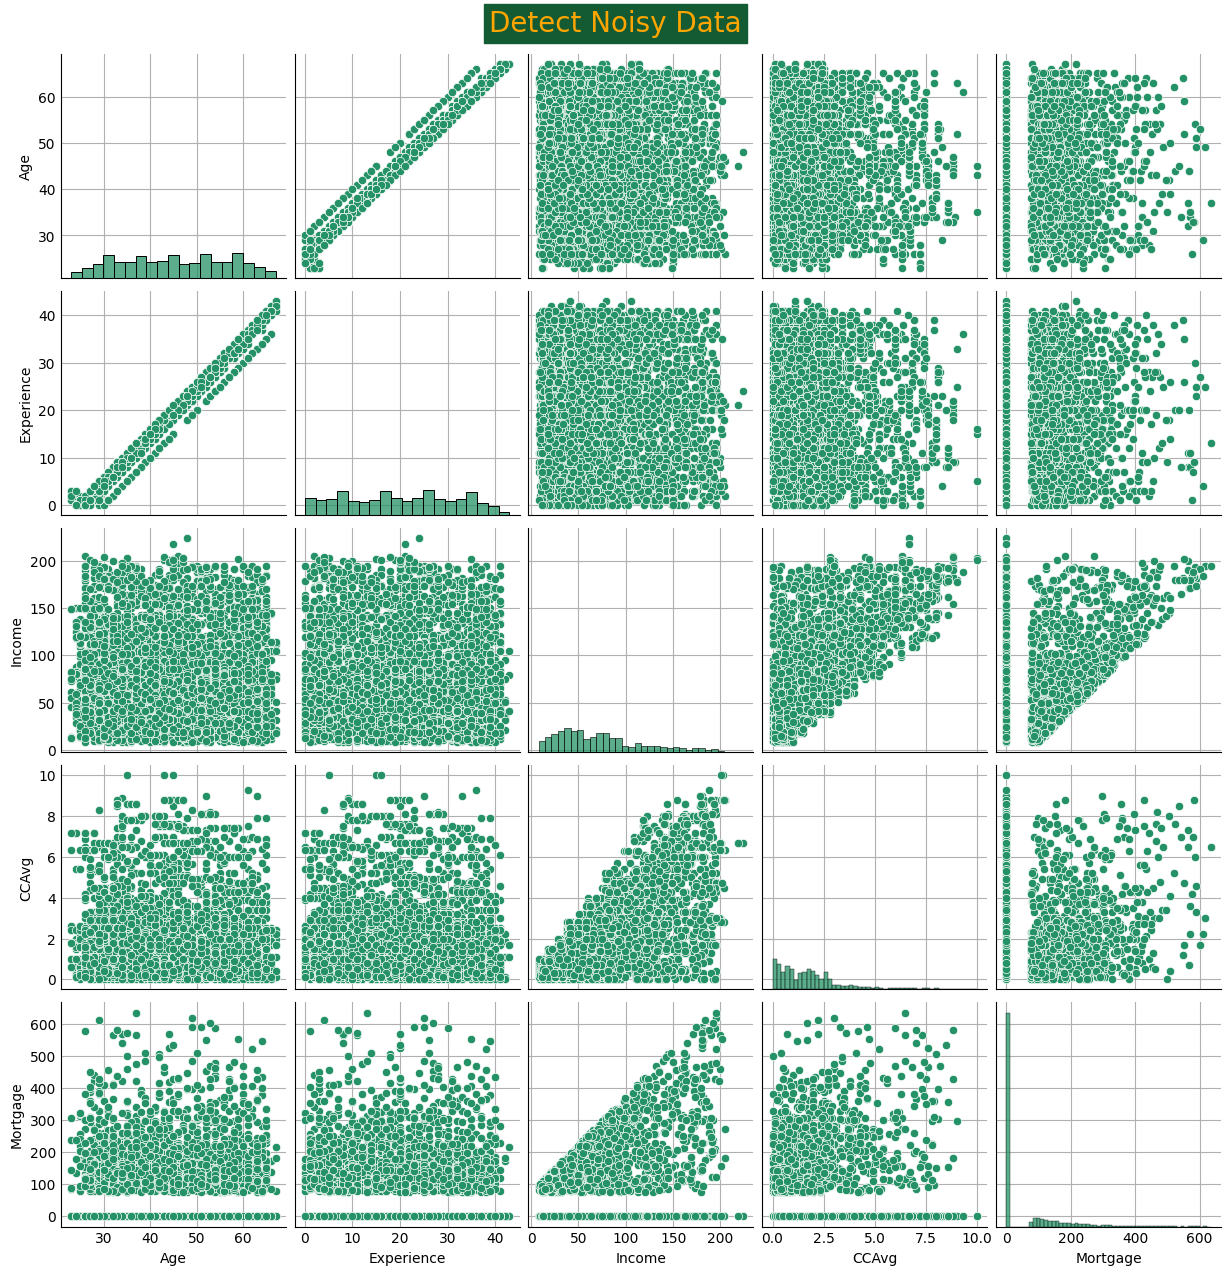

In [15]:
# checking noisy data
%matplotlib inline
sns.set_palette('summer')
dnp = sns.pairplot(df.loc[:, ~df.columns.isin(discrete_cols1)])
dnp.fig.suptitle('Detect Noisy Data', y=1.02, **FONT)

plt.show()

In [55]:
fig = go.Figure()

for col in df.columns:
    fig.add_trace(go.Box(y=df[col], name=col))

fig.update_layout(
    title_text="Box Plot – Outliers by Feature",
    title_font=dict(color='orange', family='newtimeroman', size=25),
    title_x=0.45,
    paper_bgcolor='#145A32',
    font=dict(color='#DAF7A6', family='newtimeroman', size=16),
)

fig.show()

*An outlier is an observation that is unlike the other observations and we see some of these in above boxplot for some comlumns but outliers are innocent until proven guilty. they should not be removed unless there is a good reason for that. According to pairplot, noisy data does not appear to exist. Therefore, we do not delete any data.

*There is only one small point that needs to be fixed. As it was said in section 1, the Income column expresses the annual income, while the CCAvg column expresses the Avg. spending on credit cards per month, so to standardize the units of the columns, we convert the annual income to monthly.

In [17]:
# converting annual income to monthly with divide by 12
df['Income'] = round(df['Income']/12, 2)
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

# ***4.Exploratory Data Analysis (EDA)***

*Before univariate analysis we check distribution of each columns:

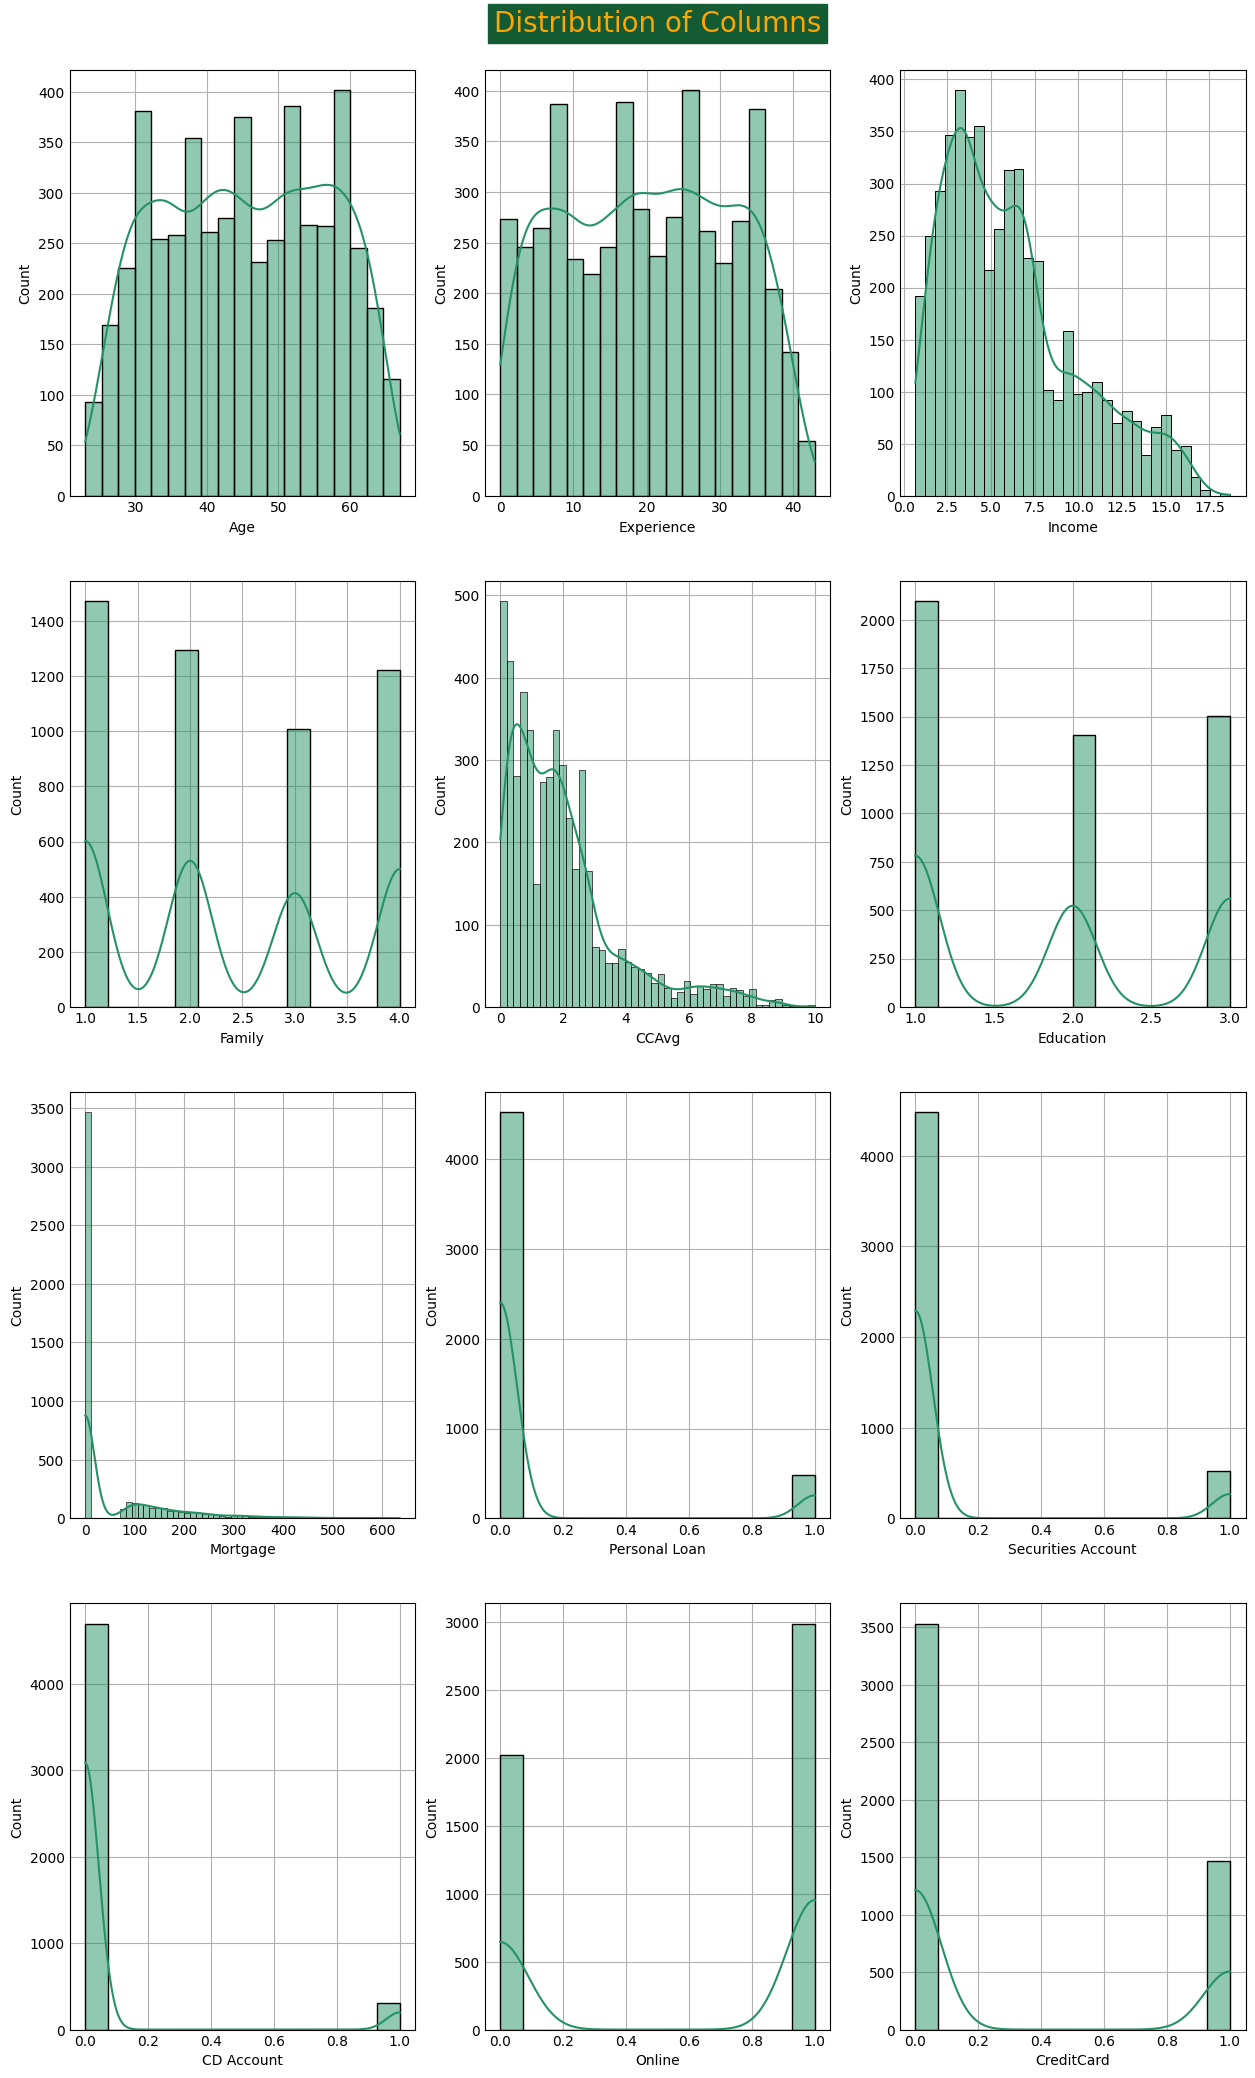

In [18]:
# checking distribution Scatter matrix (splom) with go.Splom
sns.set_palette('summer')
fig, ax = plt.subplots(4,3,figsize=(12,20))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])
fig.suptitle('Distribution of Columns', y=1.02, **FONT)
plt.show()

# ***4.1 Univariate Analysis***

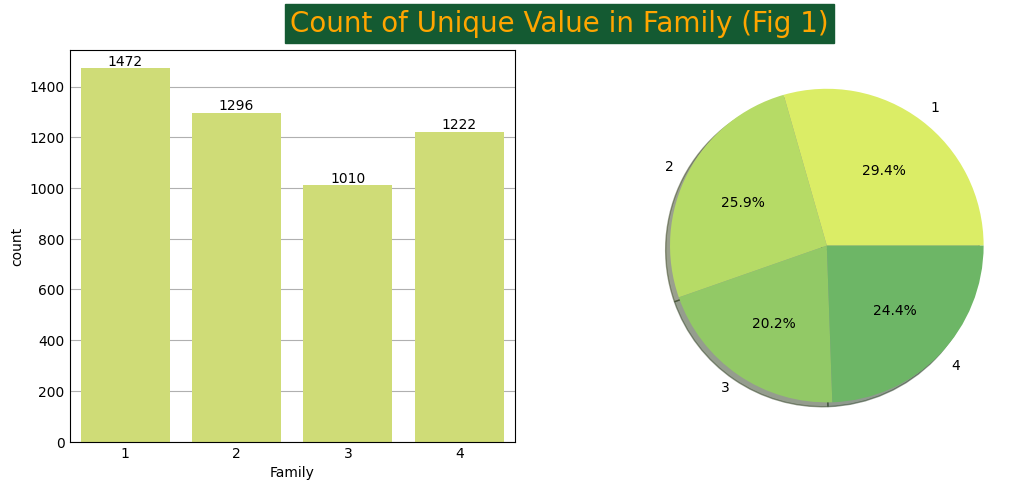

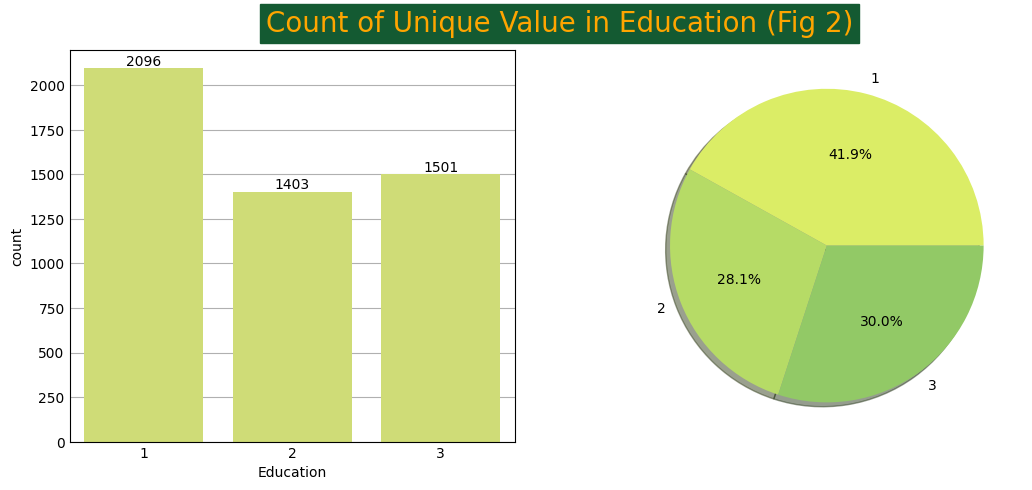

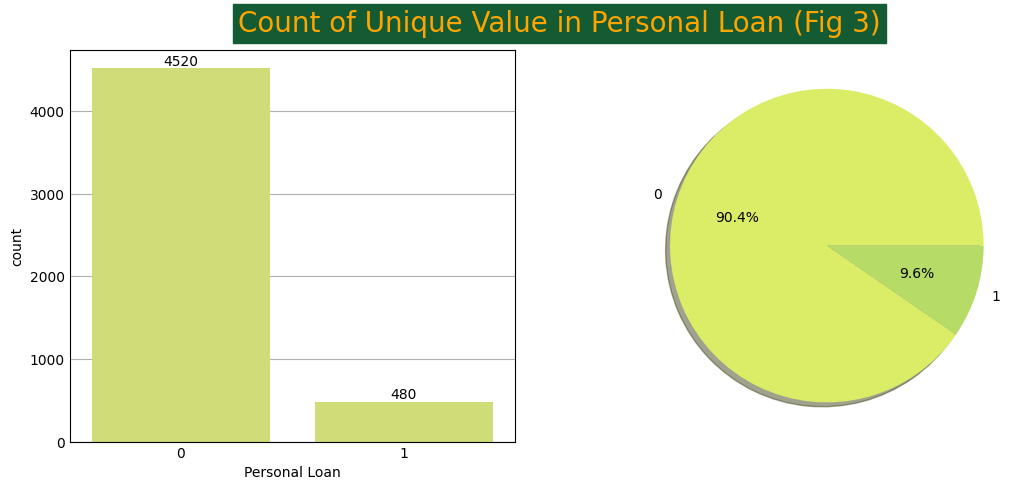

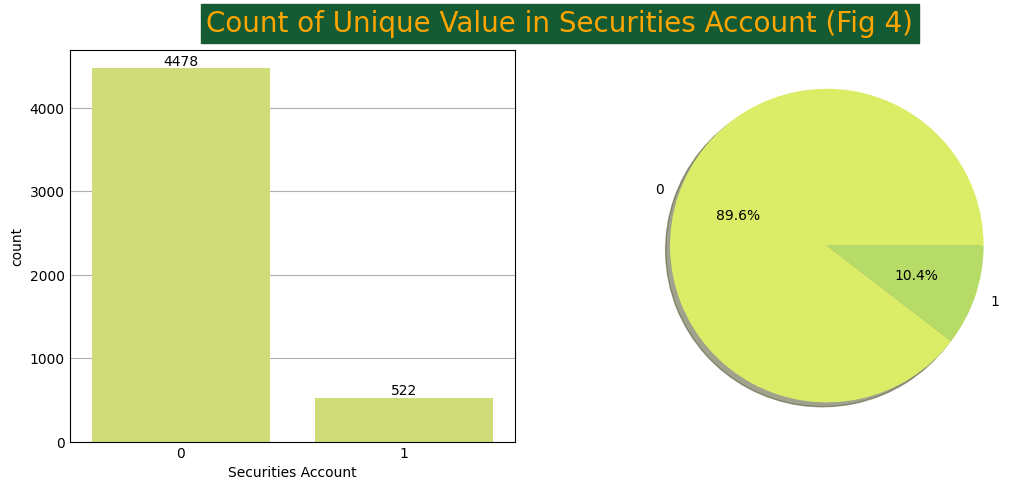

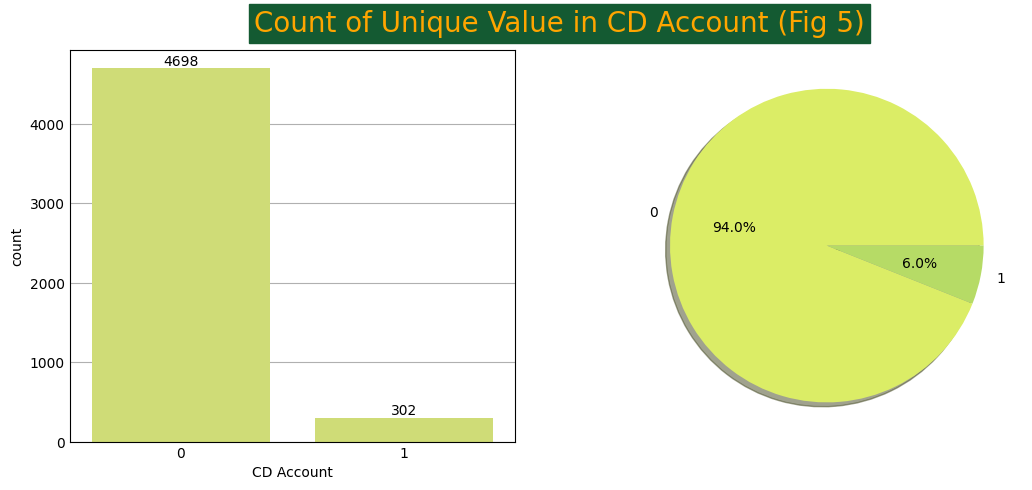

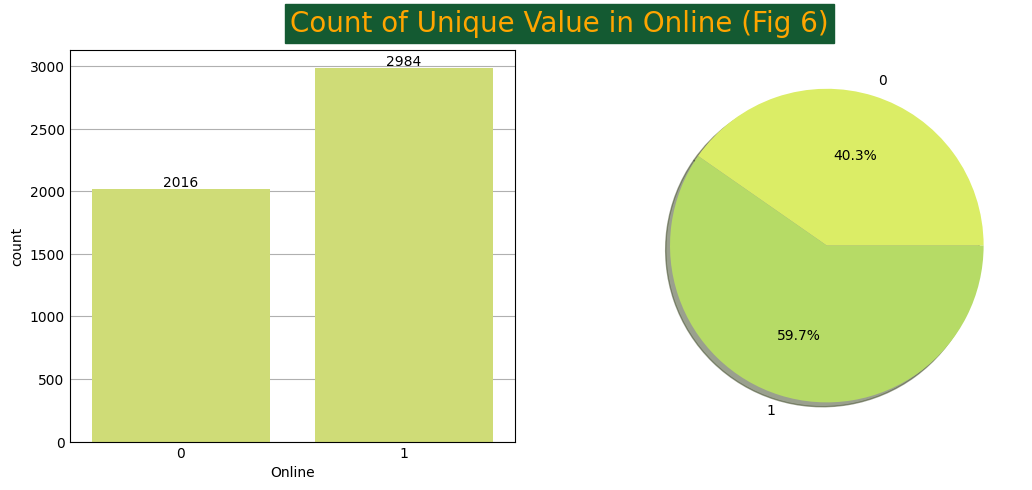

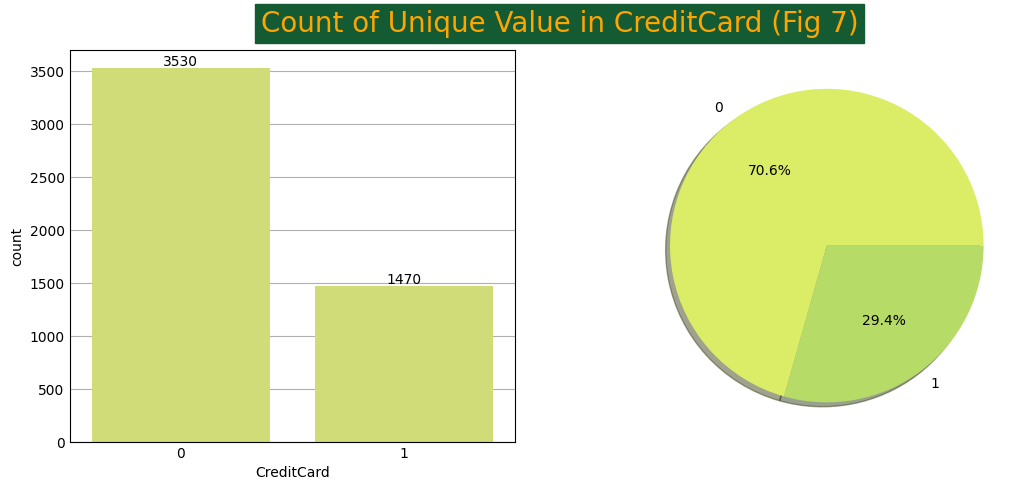

In [19]:
# univariate analysis of categorical data:
sns.set_palette("summer_r")
for i, col in enumerate(discrete_cols1):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09, **FONT)
    plt.show()

In [20]:
# univariate analysis of numerical data:
df.loc[:, ~df.columns.isin(discrete_cols1)].describe().T

count       mean         std    min    25%    50%     75%     max
Age         5000.0  45.338400   11.463166  23.00  35.00  45.00   55.00   67.00
Experience  5000.0  20.134600   11.415189   0.00  10.00  20.00   30.00   43.00
Income      5000.0   6.147912    3.836233   0.67   3.25   5.33    8.17   18.67
CCAvg       5000.0   1.937938    1.747659   0.00   0.70   1.50    2.50   10.00
Mortgage    5000.0  56.498800  101.713802   0.00   0.00   0.00  101.00  635.00

*According to above plots and tabel:

*Customers with the number of Family 1 and the number of Family 3 respectively have the highest frequency and the lowest frequency, but in general, the customers with the number of Family 1, 2, 3, and 4 are almost equally distributed in the dataset (Fig 1).

*The customers who did not accept a Personal Loan are much more than the customers who accepted a Personal Loan, and therefore there is an imbalance in the classes, so we must be careful to consider the imbalance in the model section for resampling the data.

*Most of the bank's customers have education level 1 i.e. Undergrad (Fig 2).

*Most of the bank's customers (90.4%) did not accept the personal loan offer (Fig 3).

*Most of the bank's customers (89.6%) did not have a Securities Account (Fig 4).

*Most of the bank's customers (94%) did not have a CD Account (Fig 5).

*Most of the bank's customers (59.7%) used internet banking facilities (Fig 6).

*Most of the bank's customers (70.6%) did not use a credit card issued by Universal Bank(Fig 6).

*The Age range of customers is between 23 and 67 years. The average age of customers is almost 45.

*The Experience range of customers is between 0 and 43 years. The mean age of customers is almost 20.

*The age and experience columns have a similar distribution. Also, the column of income, mortgage and average distribution are almost similar, all of them are skewed to the right.

*The average income of the bank's customers per month is approximately 6 thousand dollars and its range is between 0.67 and 18.67 thousand dollars. CCAvg of the bank's customers per month is approximately 1.94 thousand dollars and its range is between 0 and 10 thousand dollars.

*The average Mortgage of the bank's customers is approximately 56 thousand dollars and its range is between 0 and 635 thousand dollars.

# ***4.2 Bivariate Analysis***

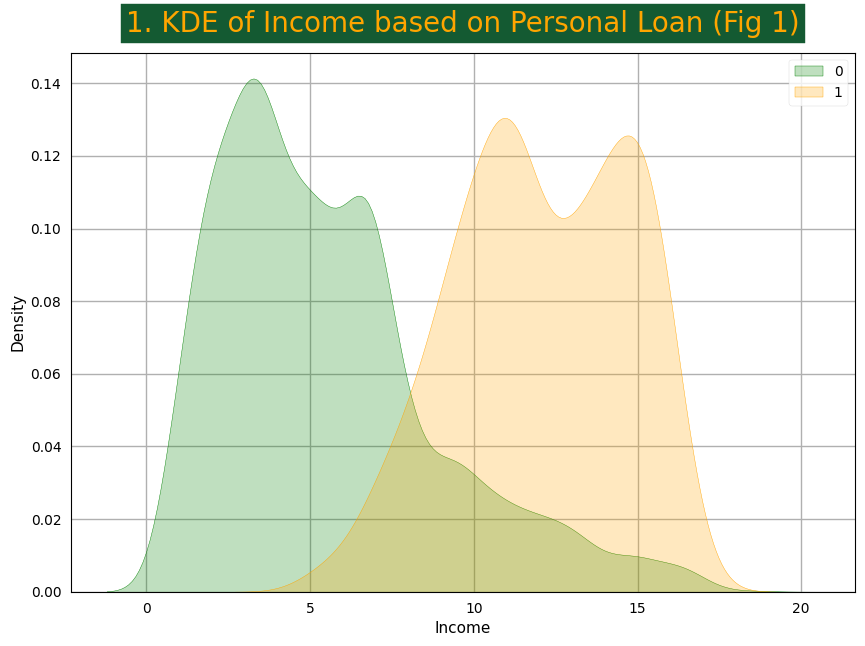

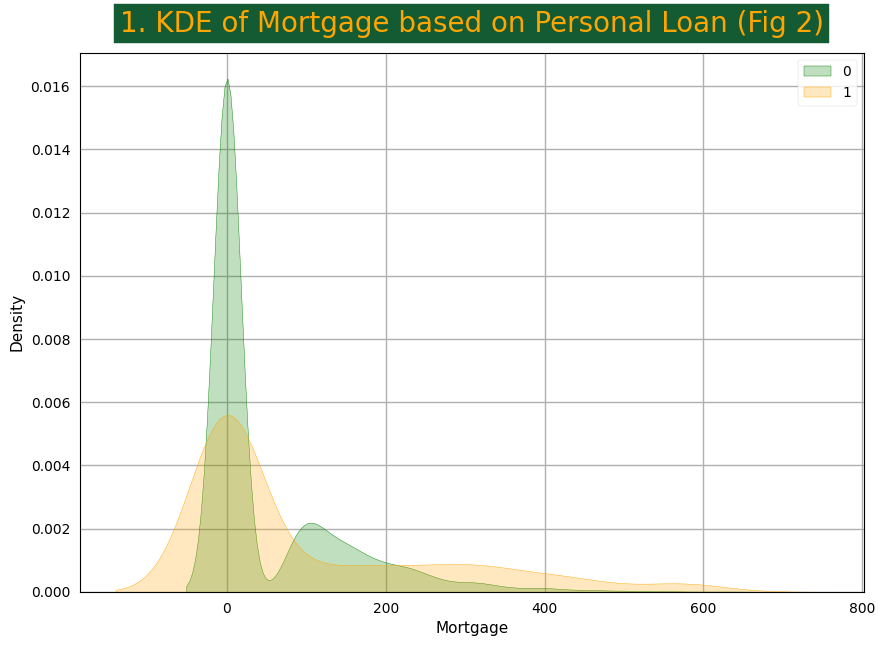

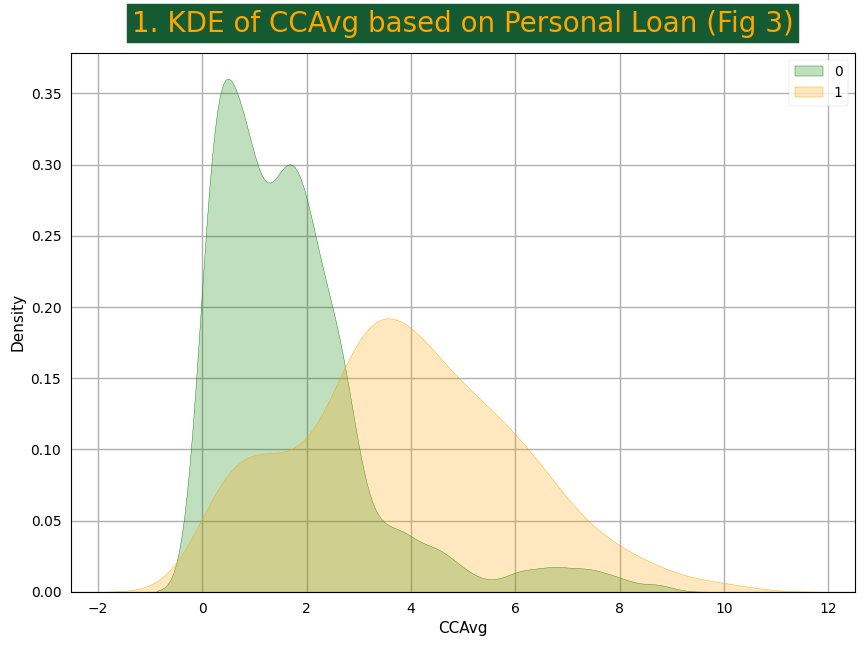

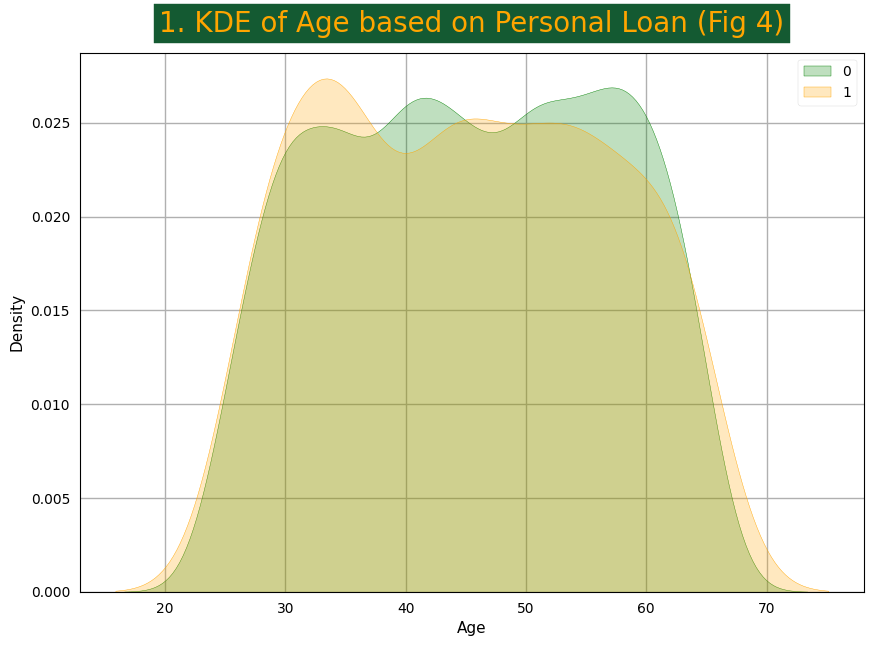

In [21]:
%matplotlib inline
plt.style.use('seaborn-v0_8-notebook')
sns.set_palette(['green','orange'])
for j, col in enumerate(['Income','Mortgage','CCAvg','Age']):
    for i, label in enumerate(df['Personal Loan'].unique().tolist()):
        sns.kdeplot(df.loc[df['Personal Loan'] == label, col], label=label, shade=True)
    plt.title(f'1. KDE of {col} based on Personal Loan (Fig {j+1})', fontdict=FONT, pad=15)
    plt.legend()
    plt.show()

*According to above plots:

*The Income of people who have accepted a bank loan is often higher than that of people who have not accepted a bank loan. Approximately, people whose monthly Income is more than 8 thousand dollars have accepted a bank loan (Fig 1)

*Most people who accepted a bank loan had mortgage euqal to zero (Fig 2).

*The CCAvg of people who have accepted a bank loan is often higher than that of people who have not accepted a bank loan. Approximately, people whose CCAvg is more than 3 thousand dollars have accepted a bank loan (Fig 3).

*It seems that age does not have much influence in determining whether or not to accept a bank loan (Fig 4)

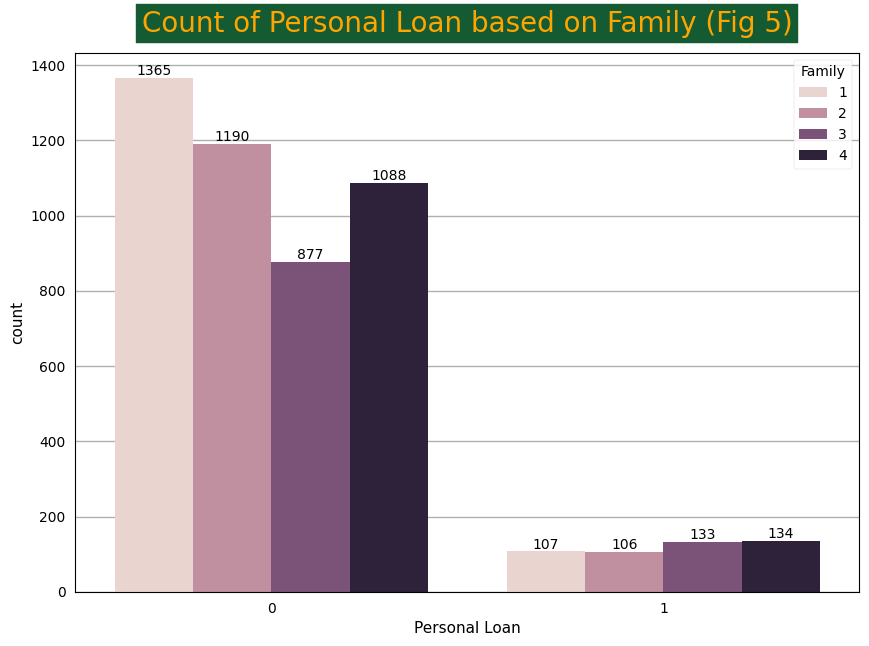

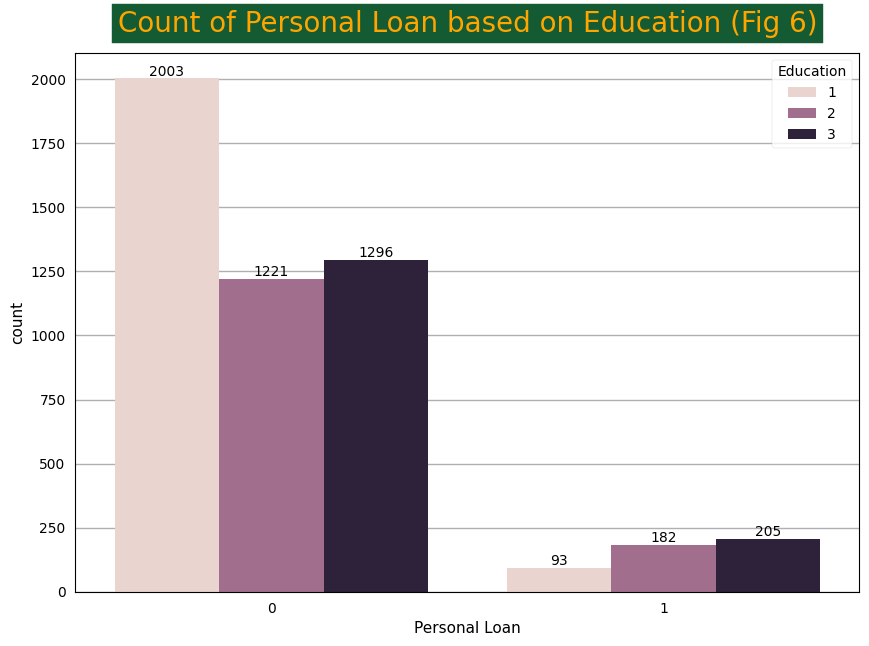

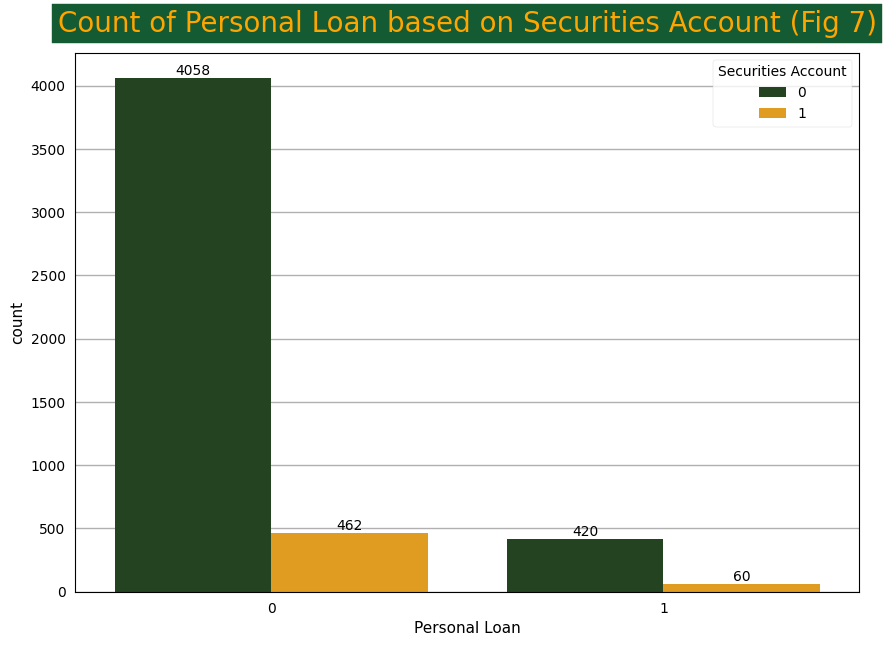

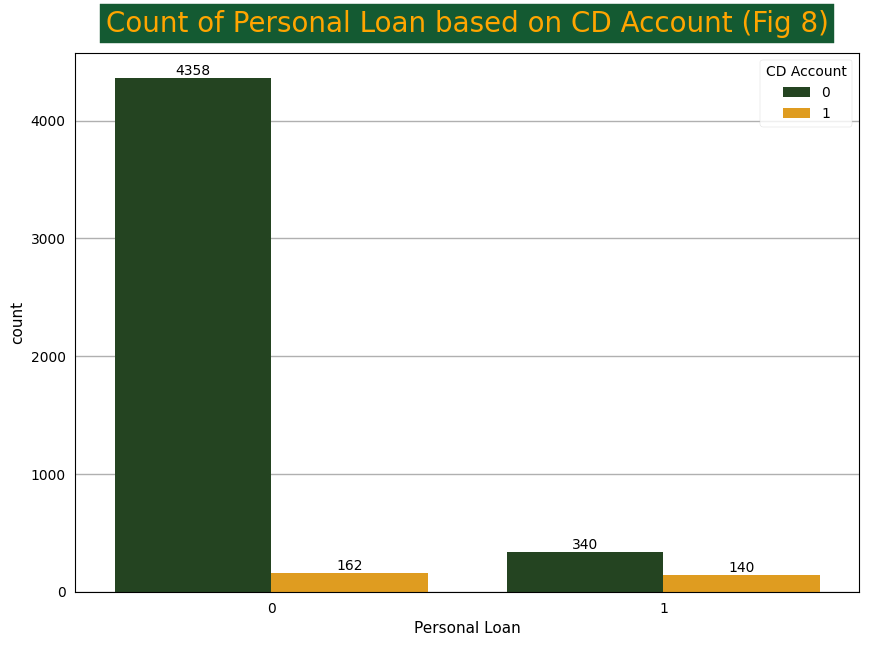

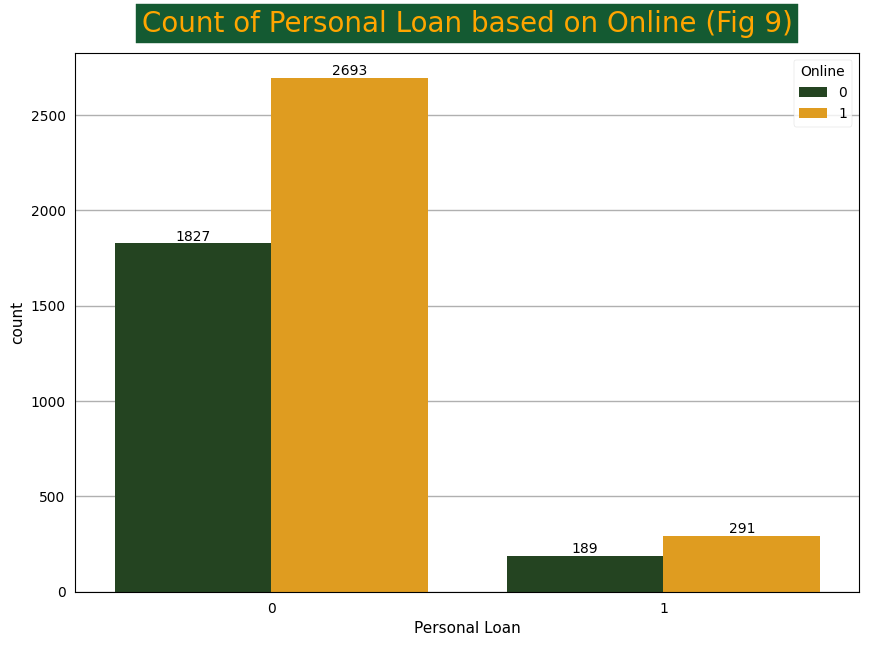

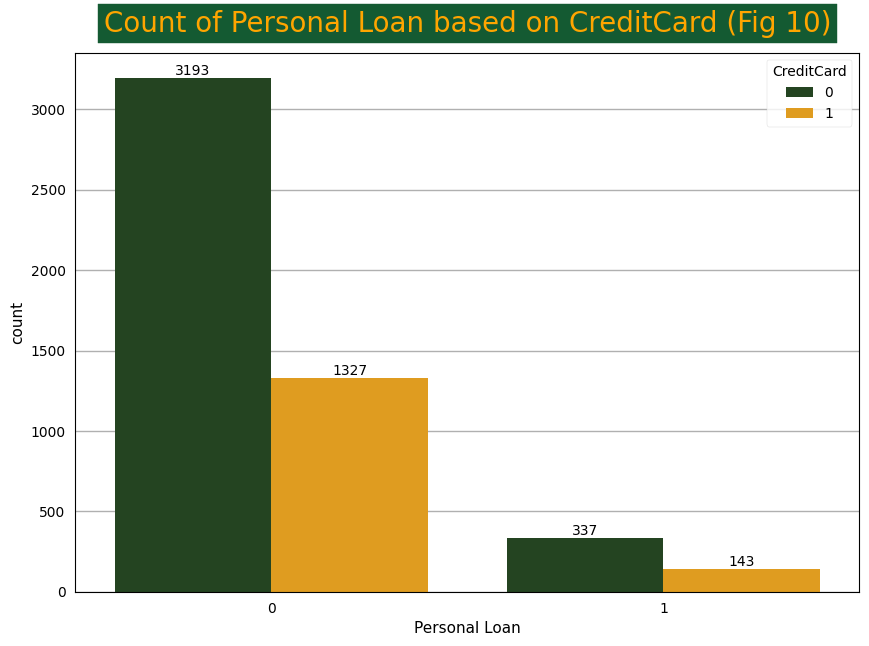

In [22]:
%matplotlib inline
sns.set_palette(['#1f4a1b','orange','#bbff33','yellow'])
discrete_cols2 = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for i, col in enumerate(discrete_cols2):
    ax = sns.countplot(data=df, x='Personal Loan', hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Count of Personal Loan based on {col} (Fig {i+5})', fontdict=FONT, pad=15)
    plt.show()

*According to above plots:

*Among the people who did not accept the personal loan, most of them had a family equal to 1, but among the people who accepted the personal loan, there is not much difference in terms of family (Fig 5).

*Among the people who did not accept the personal loan, most of them had an Education of 1, but among the people who accepted the personal loan, the Education was mostly 3 or 2 (Fig 6).

*Most of the people, both those who accepted the personal loan and those who did not, did not have a Securities Account (Fig 7).

*Most of the people, both those who accepted the personal loan and those who did not, did not have a CD Account (Fig 8).

*Most of the people, both those who accepted the personal loan and those who did not, used online banking facilities (Fig 9).

*Most of the people, both those who accepted the personal loan and those who did not, did not use a Creditcard (Fig 10).

============================== Mean of Income in each categorical feature ==============================


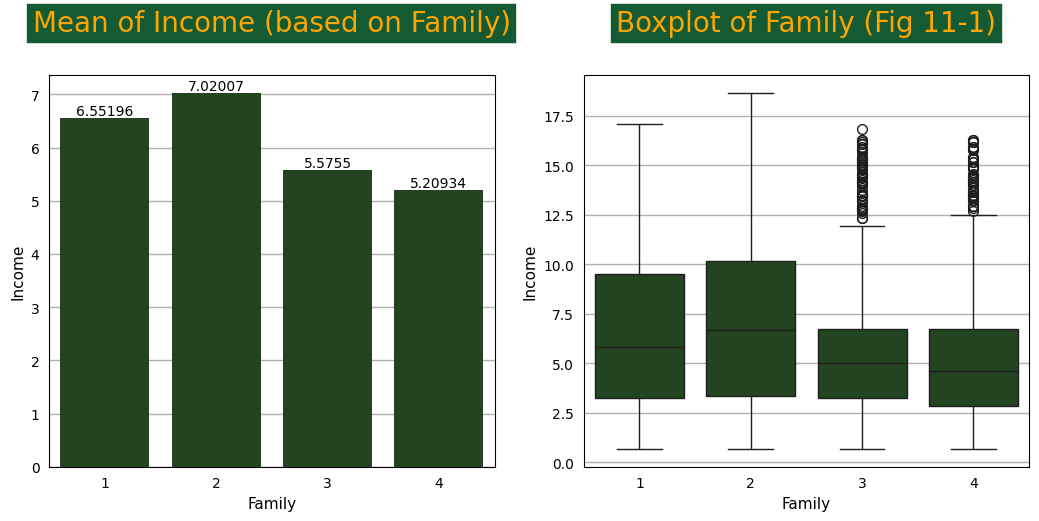

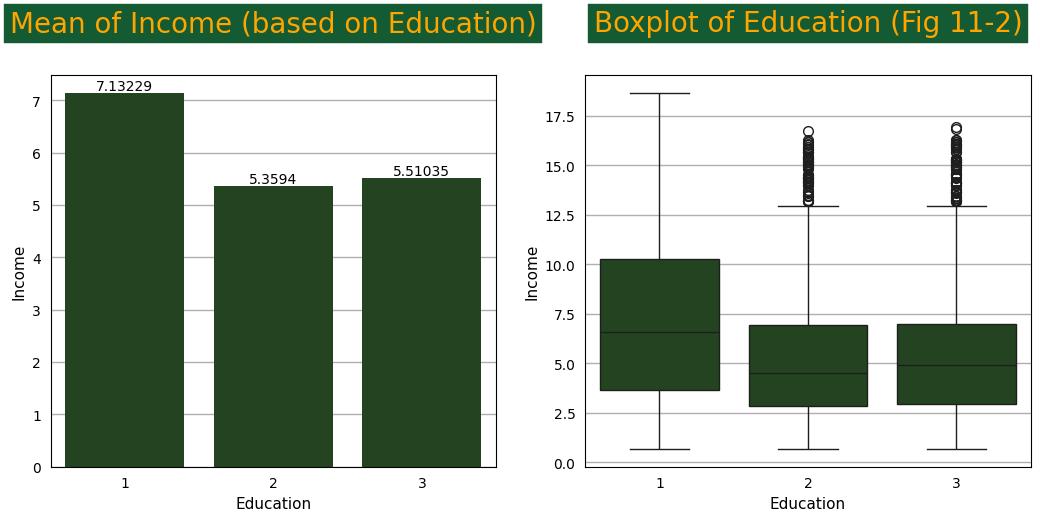

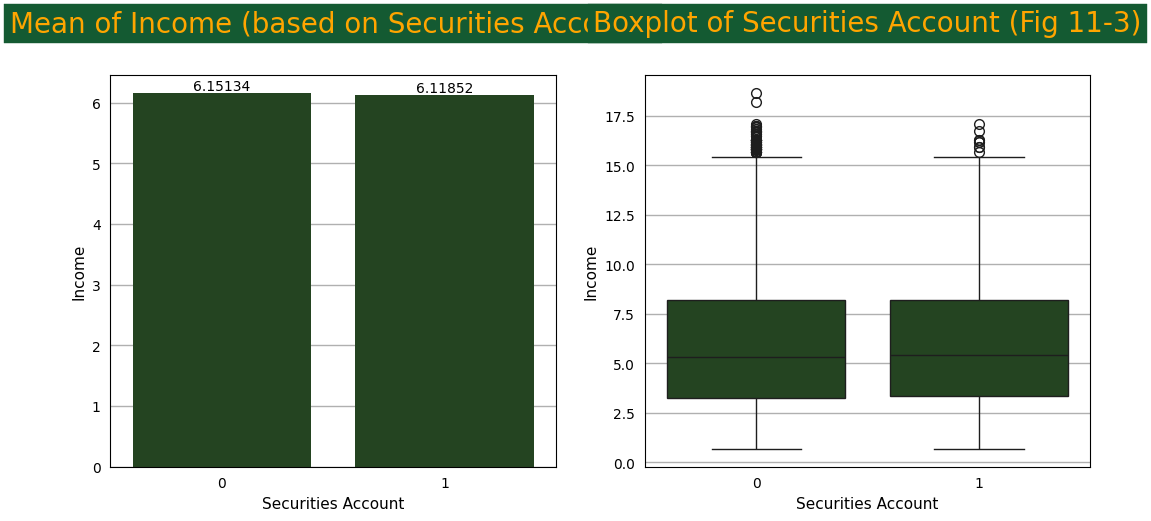

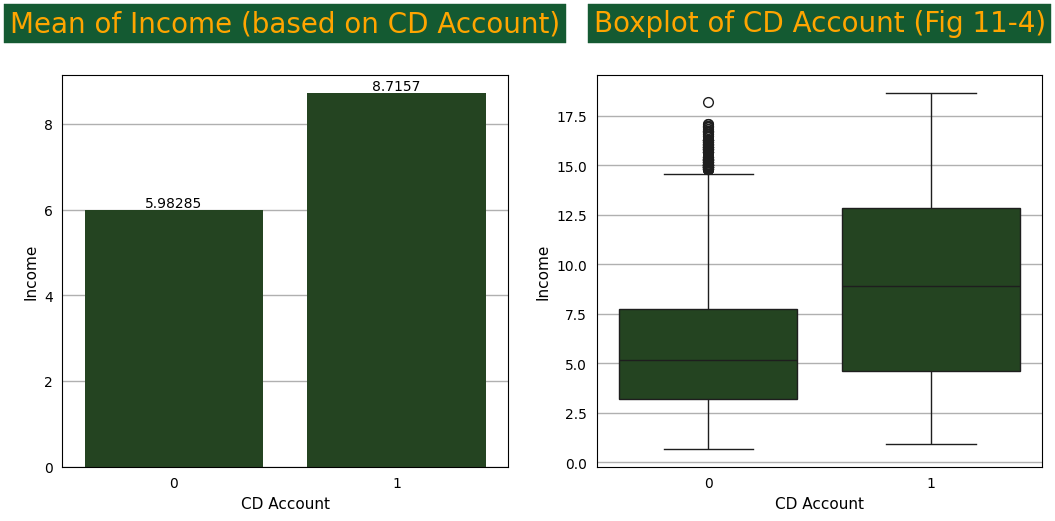

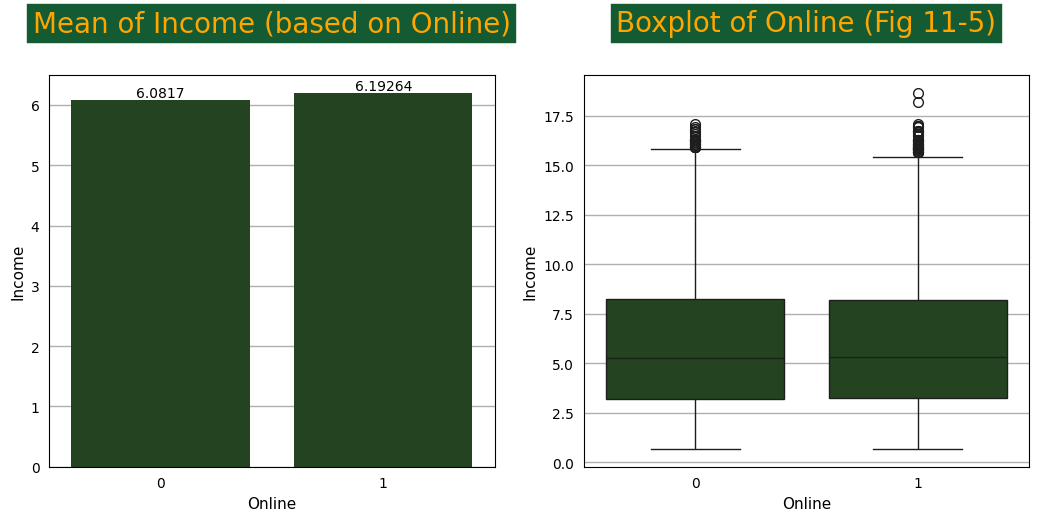

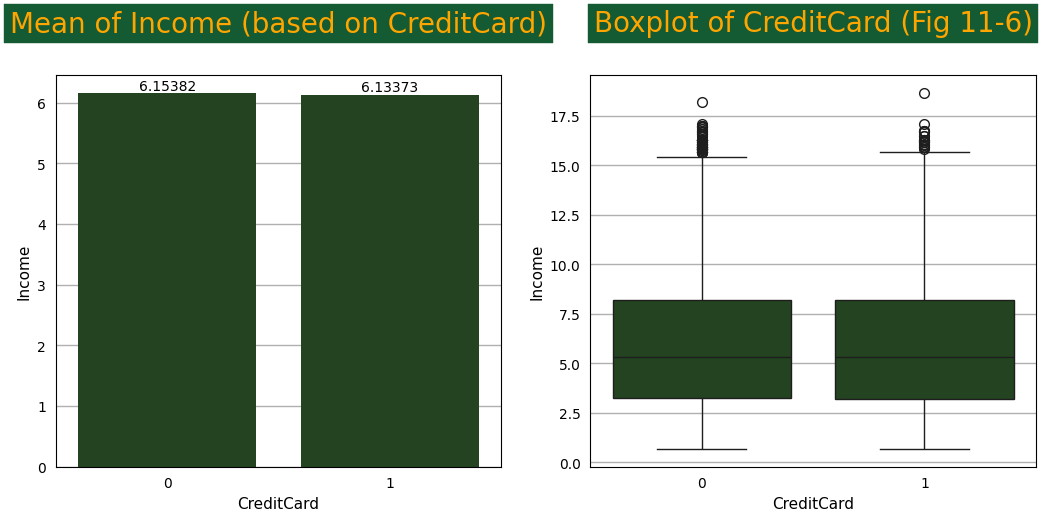

============================== Mean of CCAvg in each categorical feature ==============================


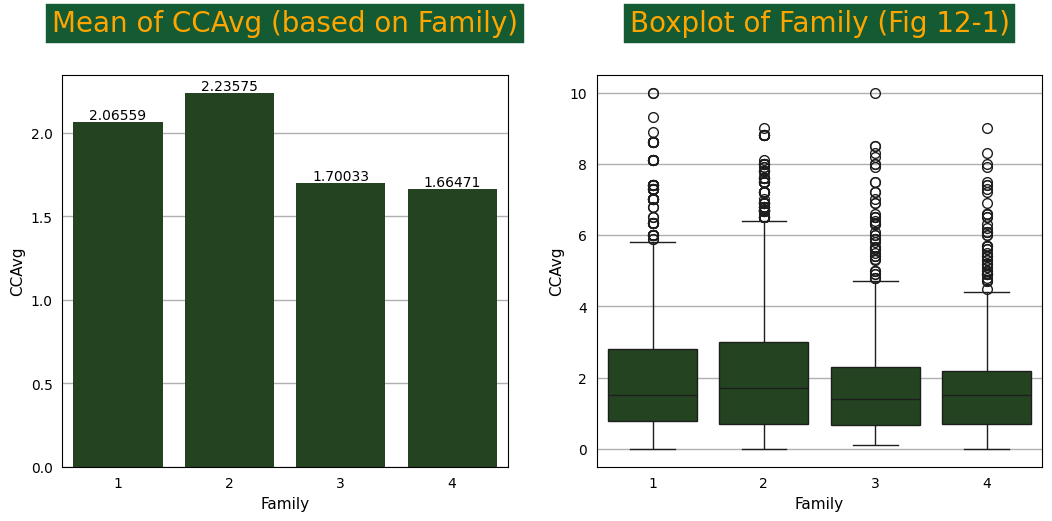

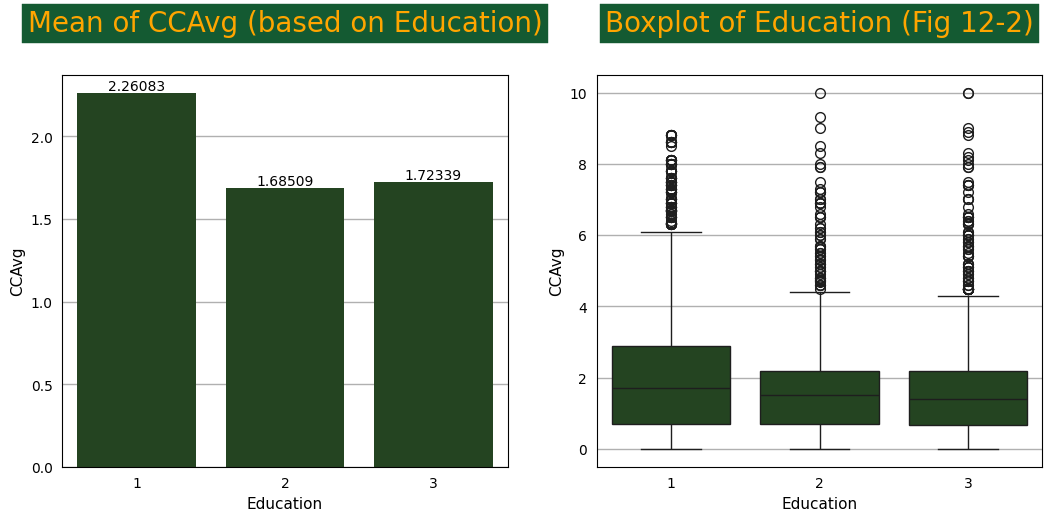

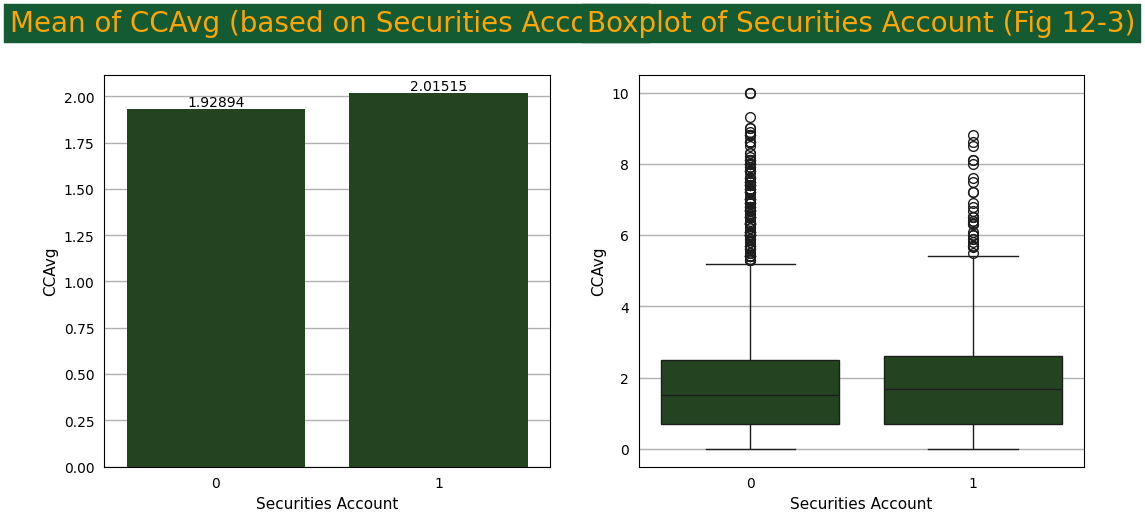

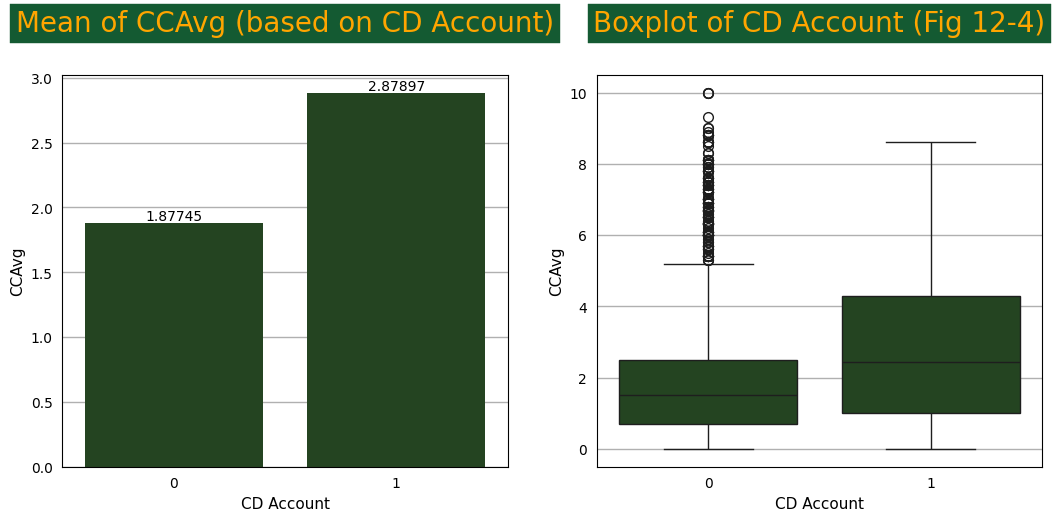

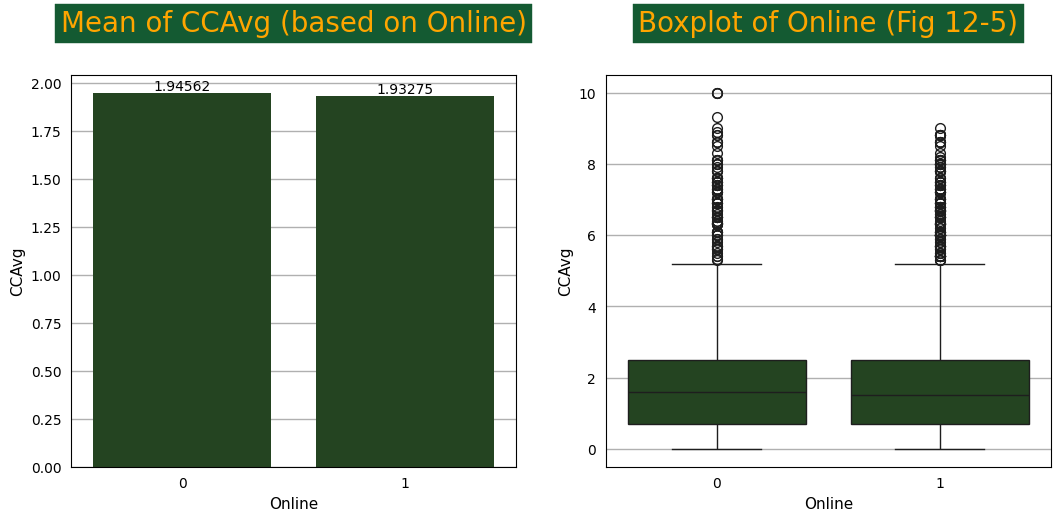

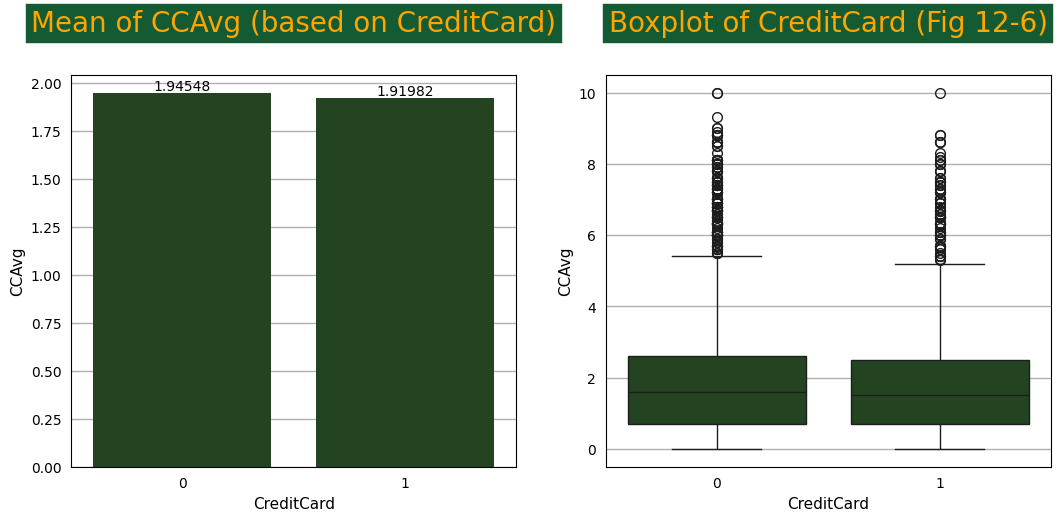

============================== Mean of Mortgage in each categorical feature ==============================


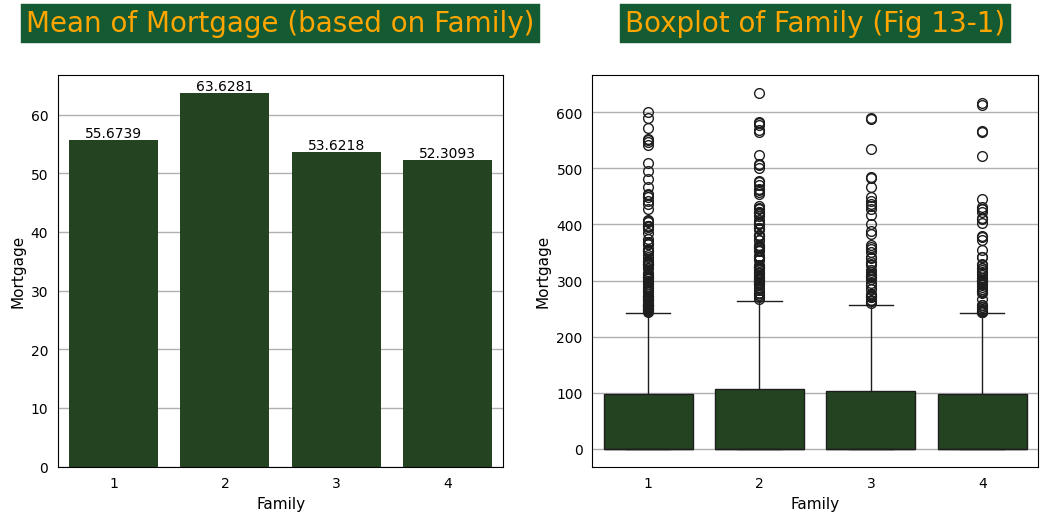

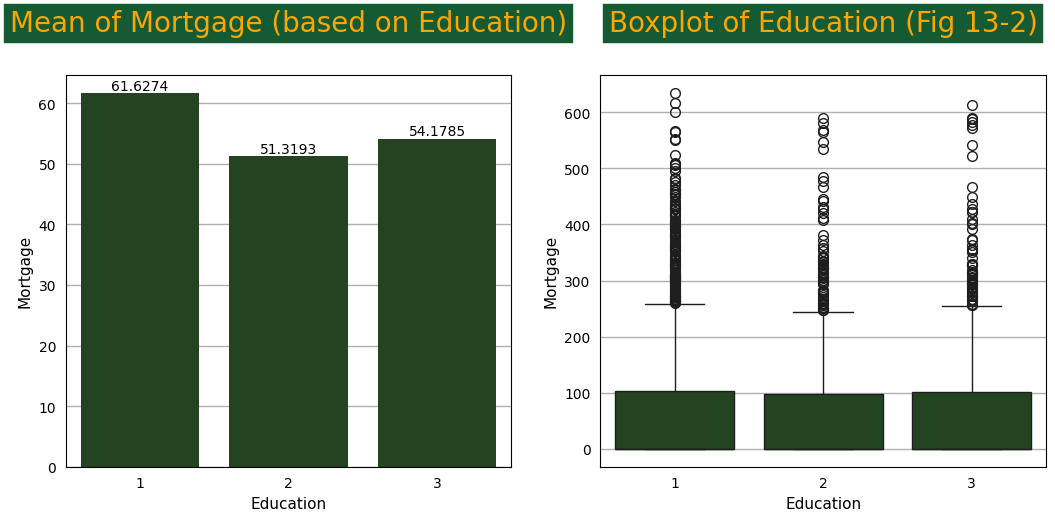

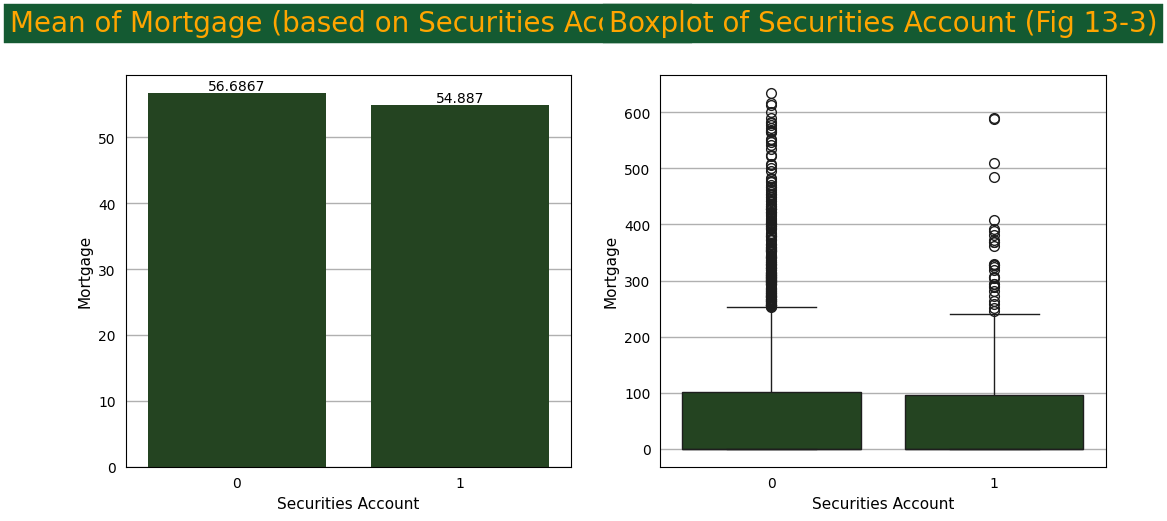

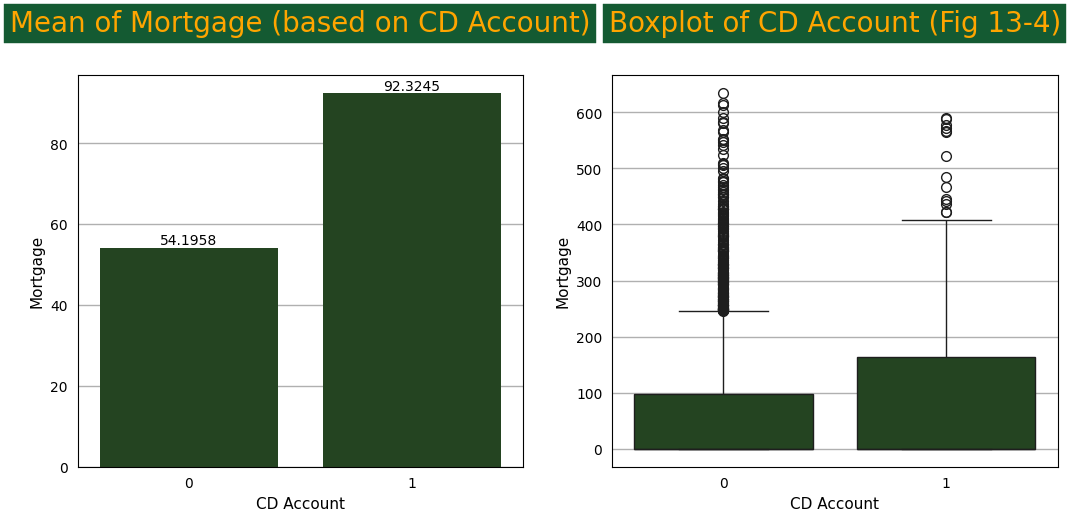

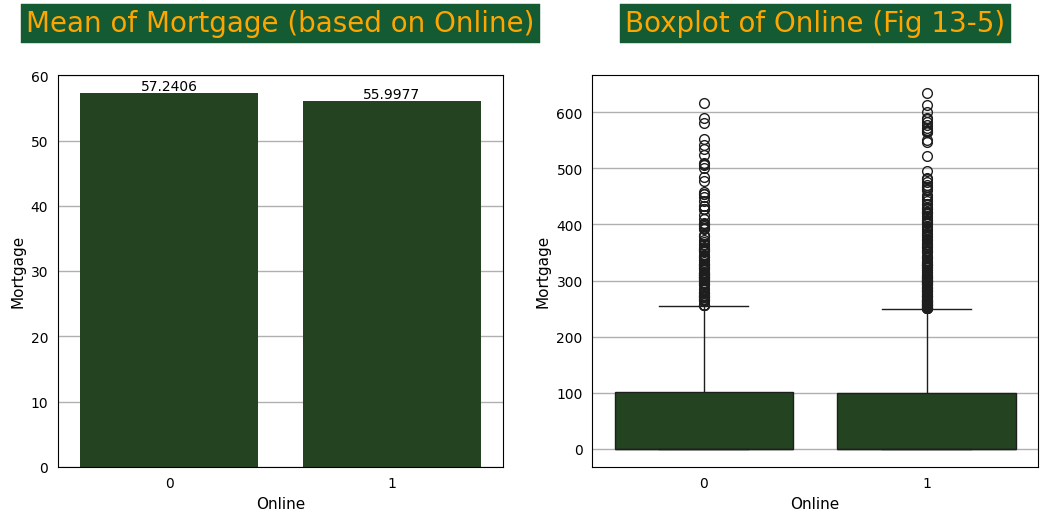

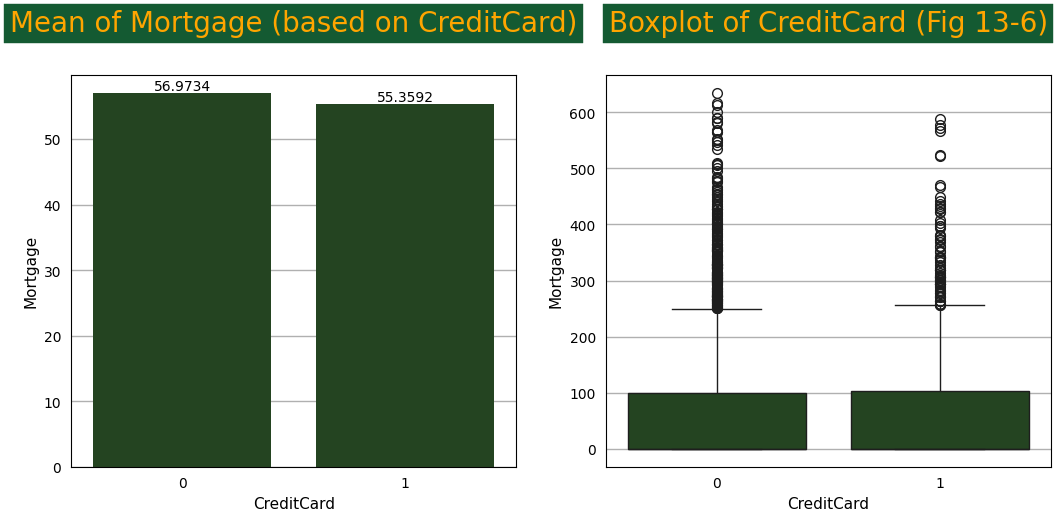

In [23]:
# Mean of Income and CCAvg based on each feature
for i, col in enumerate(['Income', 'CCAvg','Mortgage']):
    print('='*30, f"Mean of {col} in each categorical feature", '='*30)
    for j, cat in enumerate(discrete_cols2):
        fig , ax= plt.subplots(1,2, figsize=(10,4))
        gp = df.groupby([cat])[col].mean().to_frame().reset_index()
        sns.barplot(data=gp, x=cat, y=col, ax=ax[0])
        for container in ax[0].containers:
            ax[0].bar_label(container)
        ax[0].set_title(f'Mean of {col} (based on {cat})', y=1.09, **FONT)

        sns.boxplot(data=df, x=cat, y=col, ax=ax[1])
        ax[1].set_title(f'Boxplot of {cat} (Fig {i+11}-{j+1})', y=1.09, **FONT)

        plt.show()

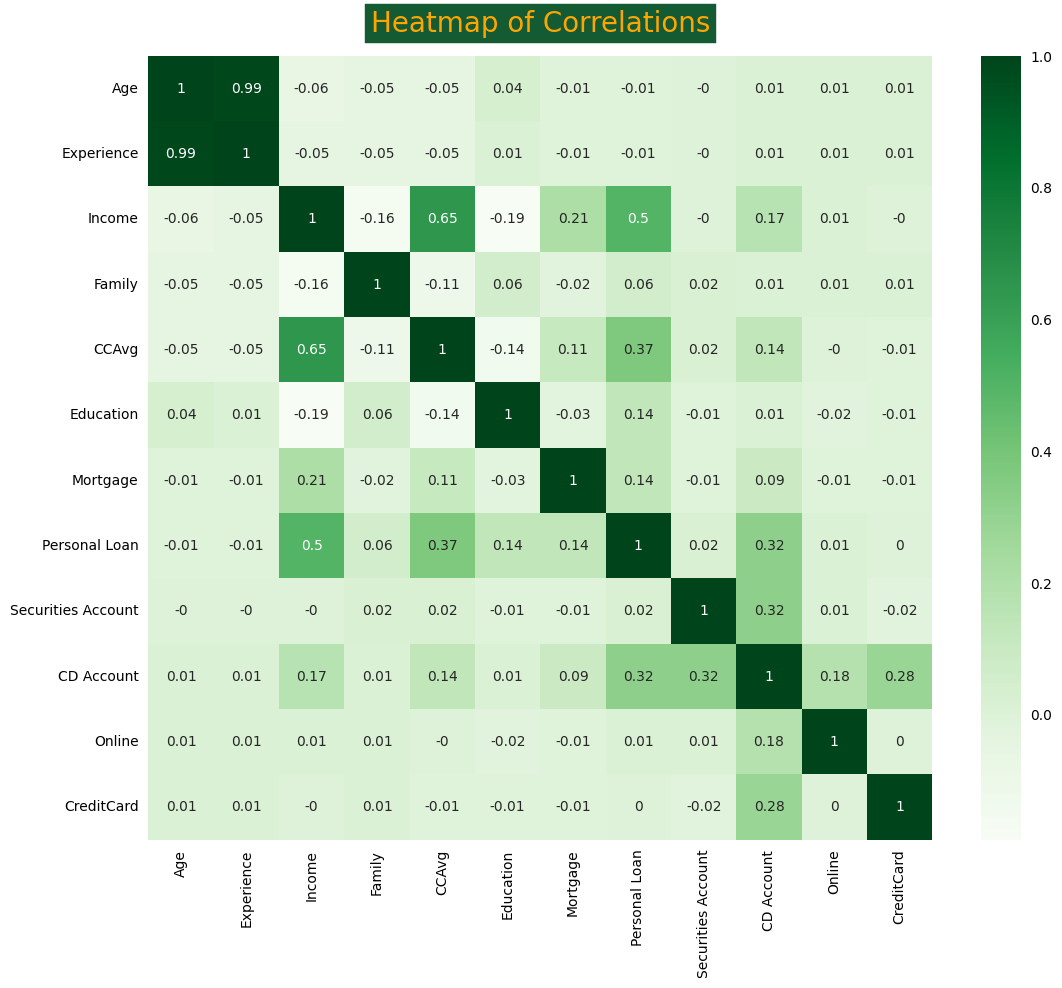

In [24]:
# drawing heatplot of correlation between columns
plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(),2), cmap='Greens', annot=True)
plt.title('Heatmap of Correlations', y=1.02, fontdict=FONT)
plt.show()

*According to above plots:

*Customers whose Family was 2 had the highest average Income (7.02 thousand $, Fig 11-1).

*Unexpectedly, customers whose Education was 1 had the highest average Income (7.13 thousand $, Fig 11-2).

*The average income of customers whose Secutities Account and CreditCard and Online was 1 is the same as that of those was zero(6.1 thousand $, Fig 11-3,5,6)

*The average income of those who have a CD account is higher than that of customers who do not have a CD account (8.7 thousand $, Fig 11-4).

*Similar results can be obtained for the CCAvg and Mortgage average, which shows that the behavior of the CCAvg, Mortgage and Income columns is somewhat similar to each other (Fig 12-1 to 13-6).

*According to the heatmap, Personal Loan has the highest correlation with Income, CCAvg and CD Account respectively.

*Age and experience have a completely linear relationship with each other.

# ***4.3 Multivariate Analysis***

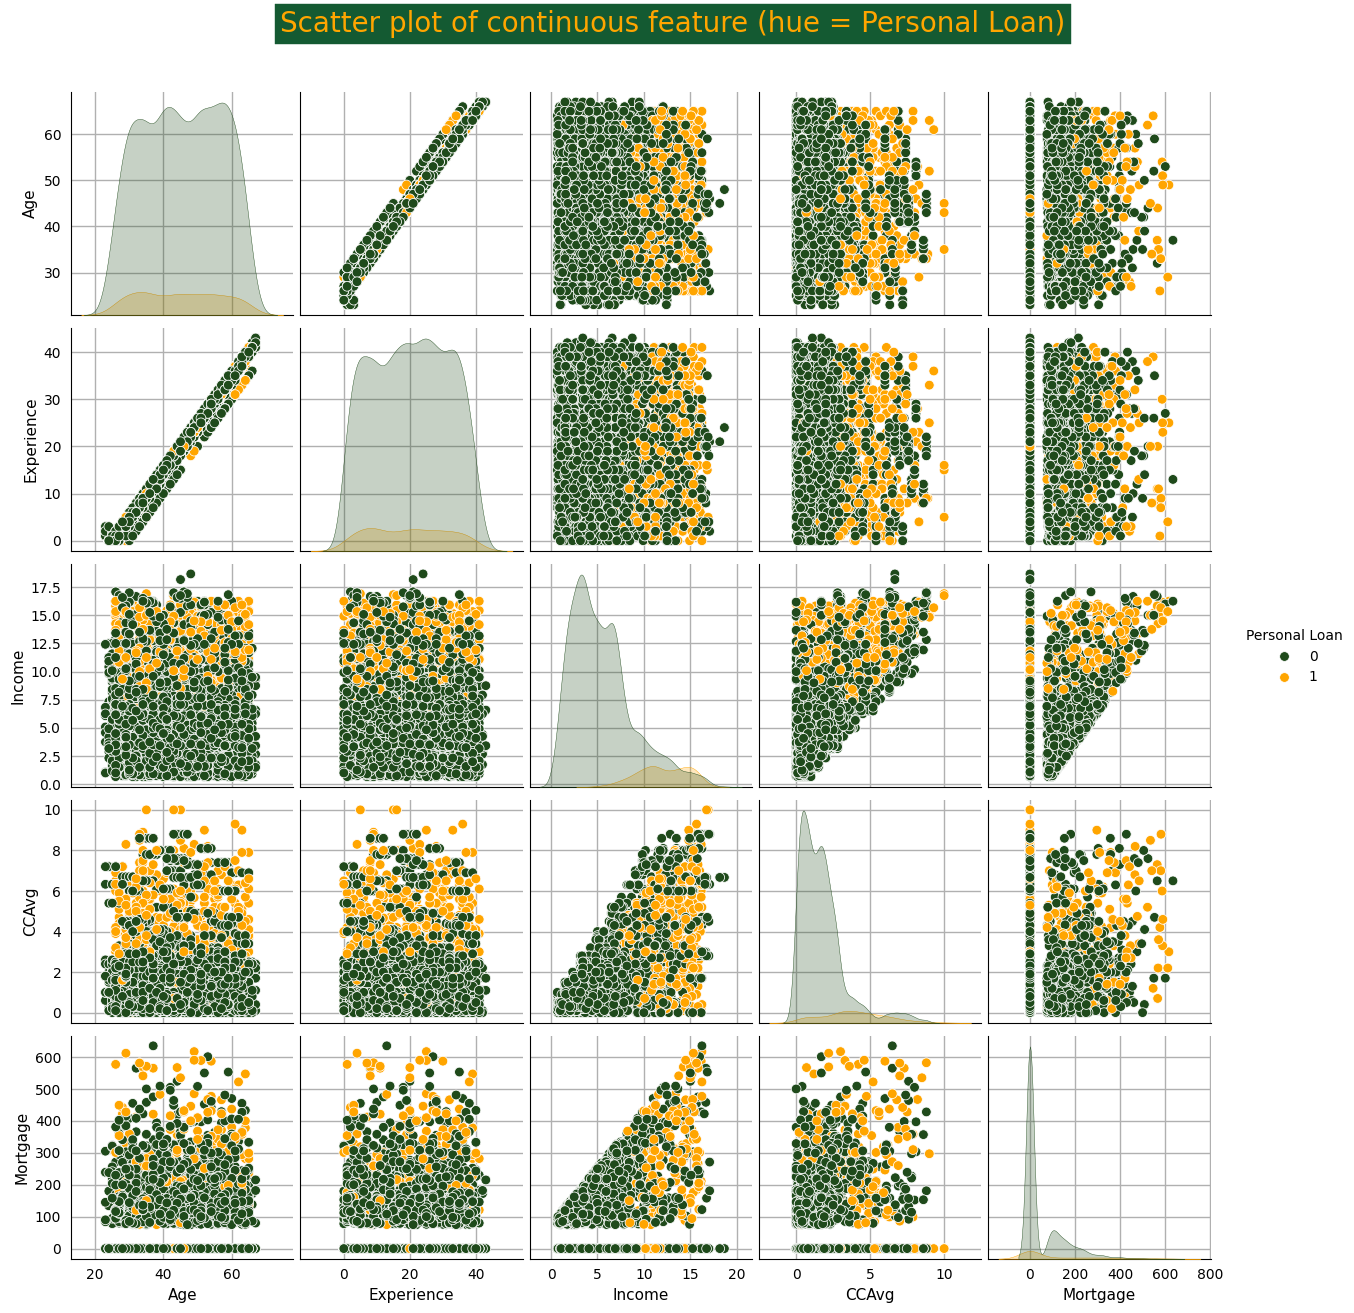

In [25]:
# drawing pairplot with hue = Personal Loan
sns.set_palette(['#1f4a1b','orange','#bbff33','yellow'])
splot = sns.pairplot(data=df, x_vars=['Age','Experience','Income','CCAvg','Mortgage'], y_vars=['Age','Experience','Income','CCAvg','Mortgage'], hue='Personal Loan')
splot.fig.suptitle('Scatter plot of continuous feature (hue = Personal Loan)', y=1.05, **FONT)
plt.show()

In [54]:
continuous_cols = ['Age', 'Experience', 'CCAvg', 'Mortgage']

for i, col in enumerate(continuous_cols):
    fig = px.scatter_3d(
        data_frame=df,
        x="Income",
        y=col,
        z="Personal Loan",
        color=df['Personal Loan'].astype(str),
        color_discrete_map={'1': 'orange', '0': 'red'},
        template='ggplot2',
        hover_name='Age',
        opacity=0.6,
        height=700,
        title=f'3D scatter of Income vs {col} vs Personal Loan (Fig {i+1})'
    )

    fig.update_layout(
        paper_bgcolor='#145A32',
        font=dict(color='#DAF7A6', family='newtimeroman', size=16),
    )

    fig.show()

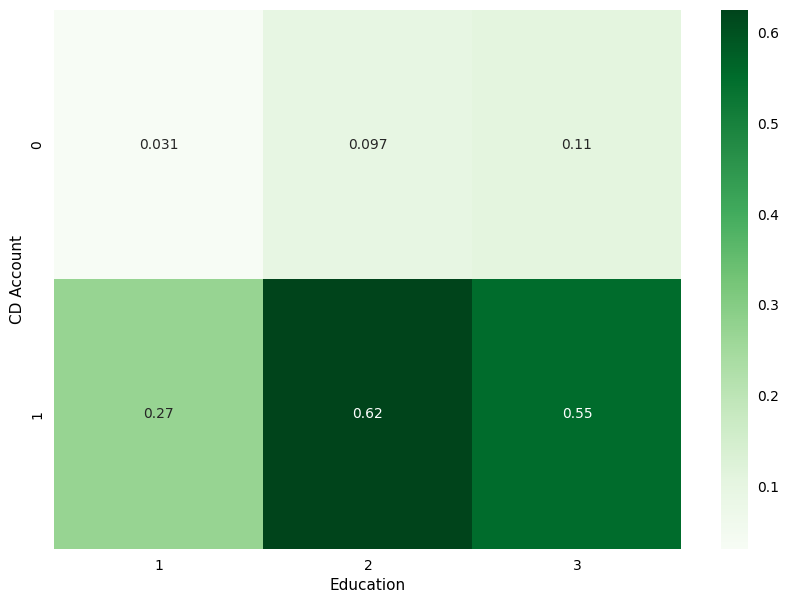

In [27]:
results = pd.pivot_table(data=df, index='CD Account', columns='Education', values='Personal Loan')
sns.heatmap(results, cmap='Greens', annot=True)
plt.show()

*According to above plots:

*Customers whose Income is less than $5 thousand per month have not accepted a personal loan.

*Most customers whose income is less than 10 thousand per month and their cc avg is $3 thousand per month have not accepted a personal loan.

*62% of customers whose CD Account was 1 and Education was 2 have accepted a personal loan.

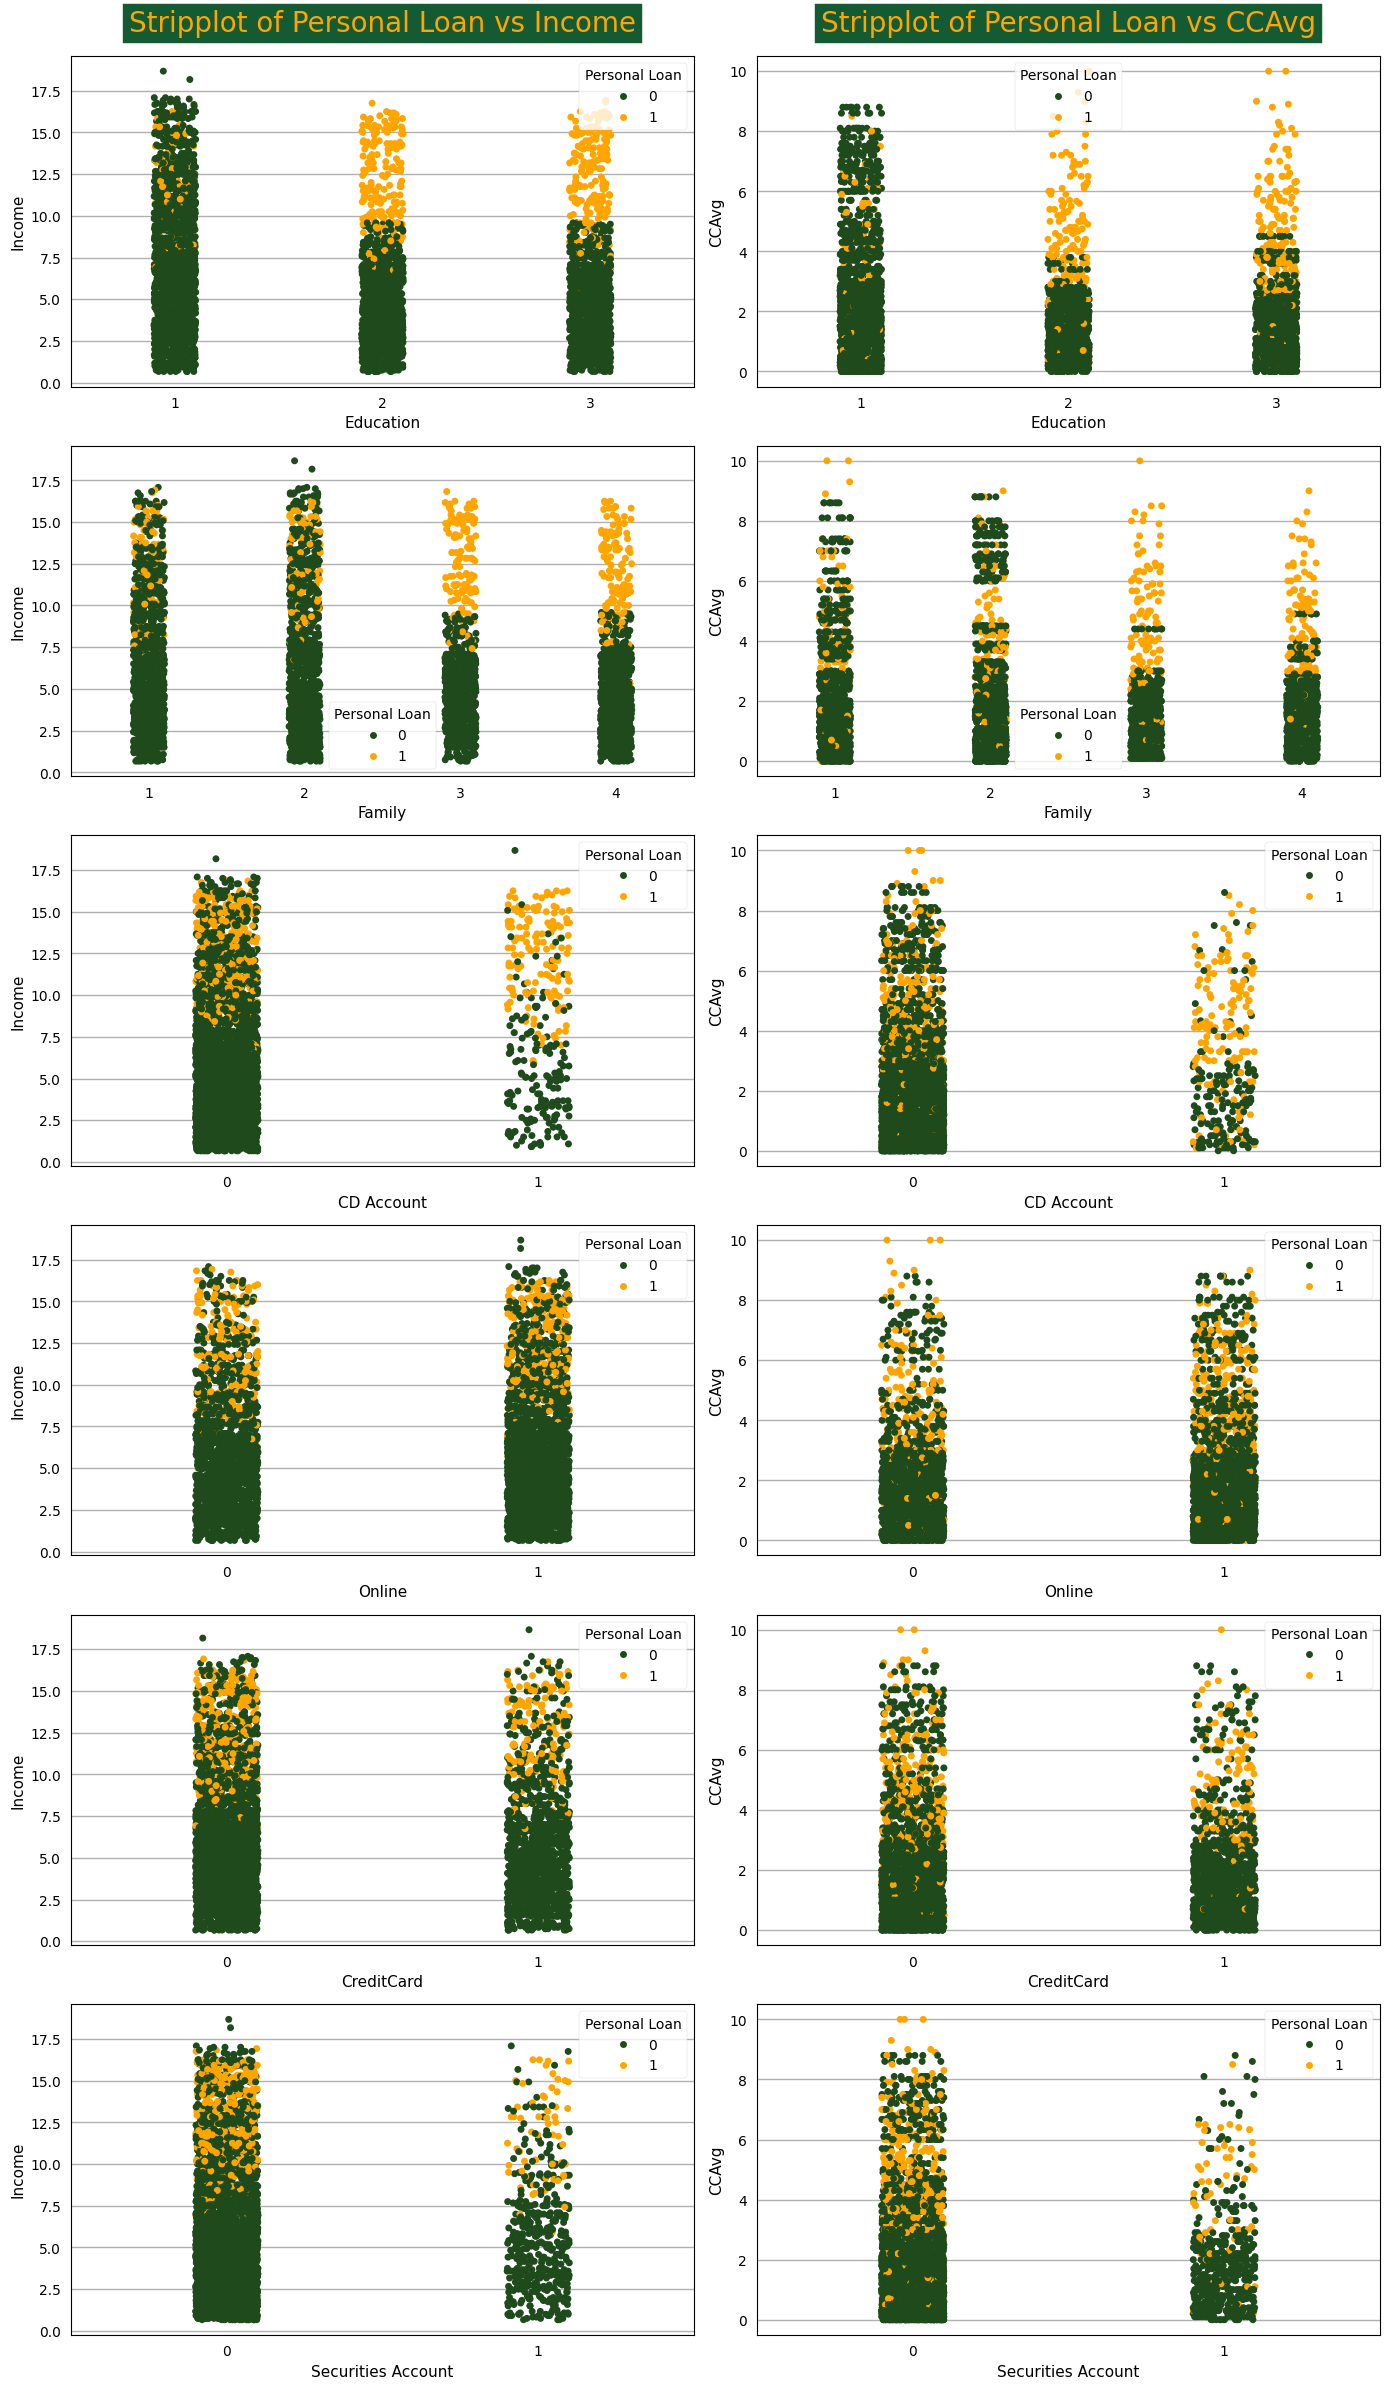

In [28]:
fig, ax = plt.subplots(6,2,figsize=(14,24))
sns.stripplot(data=df, x='Education', y='Income', hue='Personal Loan', ax=ax[0,0])
sns.stripplot(data=df, x='Education', y='CCAvg', hue='Personal Loan', ax=ax[0,1])
sns.stripplot(data=df, x='Family', y='Income', hue='Personal Loan', ax=ax[1,0])
sns.stripplot(data=df, x='Family', y='CCAvg', hue='Personal Loan', ax=ax[1,1])
sns.stripplot(data=df, x='CD Account', y='Income', hue='Personal Loan', ax=ax[2,0])
sns.stripplot(data=df, x='CD Account', y='CCAvg', hue='Personal Loan', ax=ax[2,1])
sns.stripplot(data=df, x='Online', y='Income', hue='Personal Loan', ax=ax[3,0])
sns.stripplot(data=df, x='Online', y='CCAvg', hue='Personal Loan', ax=ax[3,1])
sns.stripplot(data=df, x='CreditCard', y='Income', hue='Personal Loan', ax=ax[4,0])
sns.stripplot(data=df, x='CreditCard', y='CCAvg', hue='Personal Loan', ax=ax[4,1])
sns.stripplot(data=df, x='Securities Account', y='Income', hue='Personal Loan', ax=ax[5,0])
sns.stripplot(data=df, x='Securities Account', y='CCAvg', hue='Personal Loan', ax=ax[5,1])
ax[0,0].set_title('Stripplot of Personal Loan vs Income',y=1.05, **FONT)
ax[0,1].set_title('Stripplot of Personal Loan vs CCAvg',y=1.05, **FONT)
plt.tight_layout()
plt.show()

According to above plots:

*All customers with of more than 10 thousand and with Education level 2 or 3, accepted Personal Loans.

*All customers with CCAvg of more than 5 thousand and with Education level 2 or 3, accepted Personal Loans.

*All customers with Income of more than 10 thousand and Family 3 or 4, accepted Personal Loans.

*All customers with CCAvg of more than 5 thousand and by Family 3 or 4, accepted Personal Loans.

*Most customers with Income of more than 10 thousand and by CD Account 1, accepted Personal Loans.

*Most customers with CCAvg of more than 5 thousand and by CD Account 1, accepted Personal Loans.

# ***5.Models***

In [29]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

*This is the dataset used to build the model. For this, we first determine the values of X and Y and then check the different models in order:

In [30]:
# defining x and y
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].values.reshape(-1,1)

In [31]:
Model = []
FPR = []
TPR = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []
AUC = []

def delete_results():
    """Delete results of Previous models for preveing to avoid congestion in ROC charts"""
    global FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, AUC
    del FPR[:]
    del TPR[:]
    del ACC_test[:]
    del ACC_train[:]
    del Recall[:]
    del Precision[:]
    del F1[:]
    del AUC[:]

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    thresh = cm.max() / 2.
    for k, (i,j) in enumerate(itertools.product(range(cm.shape[0]), range(cm.shape[1]))):
        plt.text(j, i, f"{names[k]}\n{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, jaccard_score, log_loss
)
def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = StratifiedKFold(n_splits=k)
    cv_results = cross_val_score(model, x, y.ravel(), cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)

    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")


def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1


def change_test_size(model, x, y, name):
    # trying to imporve model by changing test_size
    test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
    acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test', 'Recall_train', 'Recall_test'])
    for i, test_size in enumerate(test_sizes):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
        model.fit(x_train, y_train.ravel())
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        acc_test_i = accuracy_score(y_test, y_pred_test)
        acc_train_i = accuracy_score(y_train, y_pred_train)
        rec_test_i = recall_score(y_test, y_pred_test)
        rec_train_i = recall_score(y_train, y_pred_train)
        acc_table.loc[len(acc_table.index)] = [f"{name} {i+1}", str(test_size), acc_train_i, acc_test_i, rec_train_i, rec_test_i]
    return acc_table.sort_values(by=['Recall_test'], ascending=False).style.background_gradient(cmap='summer_r')


def plot_results(FPR, TPR, AUC, ACC_test, ACC_train, Recall, Precision, F1, y_proba_test, y_test, model_name, Model):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR(list): list of False Positive Rate
        TPR(list): list of True Positive Rate
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    fig1 = go.Figure()
    fig2 = go.Figure()
    # the green line represents where TPR = FPR
    fig1.add_shape(type='line', line=dict(color='green', dash='dash'),x0=0, x1=1, y0=0, y1=1)
    for fpr_i, tpr_i, auc_i, name in zip(FPR, TPR, AUC, Model):
        # ROC Curve
        fig1.add_trace(go.Scatter(x=fpr_i, y=tpr_i, name=f"{name} AUC = {auc_i:.4f}", mode='lines'))
    # the histogram of scores compared to true labels
    fig_hist = px.histogram(x=y_proba_test[:,1], color=y_test.ravel(), nbins=50, labels=dict(color='Personal Loan', x='Probability'))
    fig2.add_trace(fig_hist.data[0])
    fig2.add_trace(fig_hist.data[1])
    # Reducing opacity to see both histograms
    fig2.update_traces(opacity=0.75)

    # Accuracy plot
    fig3 = make_subplots(rows=1, cols=2)
    fig3.add_trace(go.Scatter(y=ACC_test, mode='lines+markers', name='ACC test', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=Recall, mode='lines+markers', name='Recall', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=Precision, mode='lines+markers', name='Precision', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=F1, mode='lines+markers', name='F1 score', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)

    fig3.add_trace(go.Scatter(y=ACC_train, mode='lines+markers', name='ACC train', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=2)
    fig3.add_trace(go.Scatter(y=ACC_test, mode='lines+markers', name='ACC test', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=2)

    # layout and figs

    fig1.update_layout(
        title= 'ROC curve and AUC score',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=700, height=500,
        showlegend=True)
    fig2.update_layout(
        barmode='overlay',
        title='Interpret ROC curve by histogram',
        xaxis_title='Probability',
        yaxis_title='Count')

    fig3.update_layout(
        showlegend=True,
        title='Model Evaluation & Train and Test Accuracy)',
        xaxis_title='Model',
        yaxis_title='Evaluation measure')
    # Setting custom x-axis labels
    fig3.update_xaxes(ticktext=list(range(1,20)))
    fig1.show()
    fig2.show()
    fig3.show()

def modeling(clf, x, y, test_size, classes, model_name, stratify=False):

    # spliting data to train and test
    if stratify:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")

    classes1 = np.unique(y_test)
    total = len(y_test)
    print(15*'-', 'Class Distribution in y_test', 15*'-')
    for c in classes1:
        n_examples = len(y_test[y_test==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")

    classes1 = np.unique(y_train)
    total = len(y_train)
    print(15*'-', 'Class Distribution in y_train', 15*'-')
    for c in classes1:
        n_examples = len(y_train[y_train==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")

    # Normalization
    # scaler = MinMaxScaler().fit(x_train)
    x_norm_train = x_train
    x_norm_test = x_test
    # defining model and fit model
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba_test[:,1])
    roc_auc = auc(fpr, tpr)

    cm = confusion_matrix(y_test, y_pred_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    rec_test = recall_score(y_test, y_pred_test)
    rec_train = recall_score(y_train, y_pred_train)
    pre = precision_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # append results
    Model.append(model_name)
    FPR.append(fpr)
    TPR.append(tpr)
    ACC_test.append(acc_test)
    ACC_train.append(acc_train)
    Recall.append(rec_test)
    Precision.append(pre)
    F1.append(f1)
    AUC.append(roc_auc)

    plot_results(FPR, TPR, AUC, ACC_test, ACC_train, Recall, Precision, F1, y_proba_test, y_test, model_name, Model)

    # Evaluating model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    print('-'*20 , 'Classification Report', '-'*20)
    print(classification_report(y_test, y_pred_test, ), '\n')
    print(f"Jaccard Score: {jaccard_score(y_test, y_pred_test)}")
    print(f"Log loss: {log_loss(y_test, y_pred_test)}", '\n')

    # print other result about predicted data
    return acc_test, acc_train, rec_test, rec_train

# ***6.Model: Logistic Regression***

*In this model, we will use our first dataset df and x and y:

In [32]:
from sklearn.model_selection import train_test_split

# spliting train and test data by inital test_size=0.2
# stratify used for considering class distribution in spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Checking cross validation on LogisticRegression model to estimate model performance (Accuracy)
logreg = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(solver='newton-cg'))])
Perform_cross_val(logreg, k=10, x=x_train, y=y_train, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.9512499999999999
CV results: [0.9475 0.9525 0.9525 0.945  0.955  0.9525 0.9475 0.95   0.96   0.95  ]



In [34]:
# Checking cross validation on LogisticRegression model to estimate model performance (Recall)
Perform_cross_val(logreg, k=10, x=x_train, y=y_train, scoring='recall')

-------------------- CV for k=10, scoring=recall --------------------
CV mean: 0.6303643724696357
CV results: [0.60526316 0.63157895 0.68421053 0.63157895 0.68421053 0.60526316
 0.58974359 0.58974359 0.66666667 0.61538462]



*According to the obtained result, we expect our LogisticRegression model to have an high accuracy so far close to or greater than 0.95 but its recall lower than previous model. Let's check it:

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[810  94]
 [  9  87]]


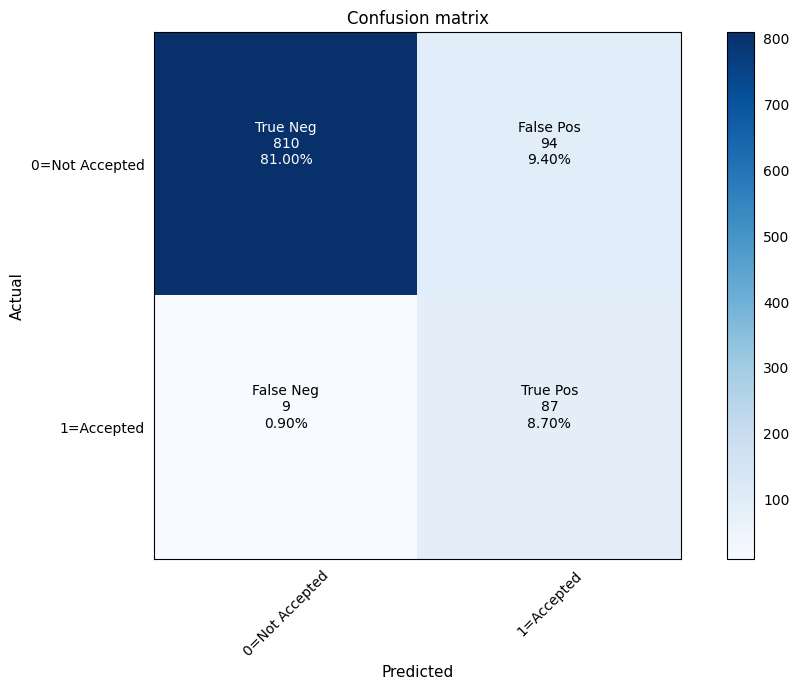

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       904
           1       0.48      0.91      0.63        96

    accuracy                           0.90      1000
   macro avg       0.73      0.90      0.78      1000
weighted avg       0.94      0.90      0.91      1000
 

Jaccard Score: 0.45789473684210524
Log loss: 3.7124962990790666 

Finished LogisticReg 1 modeling
Test recall: 0.90625
Train recall: 0.8854166666666666


In [53]:
from sklearn.linear_model import LogisticRegression

# Features/target
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'].values.reshape(-1, 1)

# Defining base logistic regression model
logreg = LogisticRegression(
    solver='liblinear',
    penalty='l2',
    C=1.0,
    max_iter=1000,
    class_weight='balanced'
)

# Calling modeling function
acc_test_5_1, acc_train_5_1, rec_test_5_1, rec_train_5_1 = modeling(
    clf=logreg,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='LogisticReg 1',
    stratify=True
)

print("Finished LogisticReg 1 modeling")
print("Test recall:", rec_test_5_1)
print("Train recall:", rec_train_5_1)

In [36]:
print(f"Recall train: {rec_train_5_1}")
print(f"Recall test: {rec_test_5_1}")

Recall train: 0.8854166666666666
Recall test: 0.90625


*The accuracy and recall obtained is the same as we expected. To improve models, other test size values are also checked:

In [37]:
# trying to imporve model by changing test_size
pipe5_1 = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])
change_test_size(pipe5_1, x, y, 'LogisticReg')

In [38]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# defining models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
scaler = StandardScaler().fit(x_train)
x_norm_train = scaler.transform(x_train)
x_norm_test = scaler.transform(x_test)
grid_result = grid_search.fit(x_norm_train, y_train.ravel())
# summarizing results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Best: 0.6251012145748989 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.0 (0.0) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.0 (0.0) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.0 (0.0) with: {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
0.0 (0.0) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.0 (0.0) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.6250337381916329 (0.04658905893093731) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.0 (0.0) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.0 (0.0) with: {'C': 100, 'penalty': 'l1', 's

*You may see some warnings during the optimization for invalid configuration combinations. These can be safely ignored.

*The results are summarized as follows:

*Best: 0.6251012145748989 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[892  12]
 [ 35  61]]


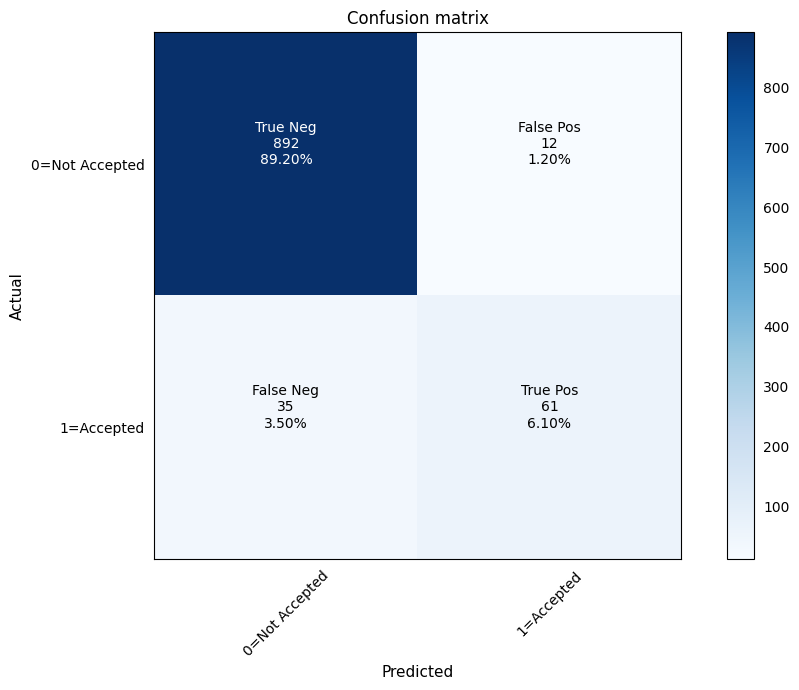

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.84      0.64      0.72        96

    accuracy                           0.95      1000
   macro avg       0.90      0.81      0.85      1000
weighted avg       0.95      0.95      0.95      1000
 

Jaccard Score: 0.5648148148148148
Log loss: 1.6940517092885063 

Finished LogisticReg 2
Train recall: 0.633
Test recall:  0.635


In [52]:
# Better Logistic Regression model
logreg2 = LogisticRegression(
    solver='liblinear',
    penalty='l1',
    C=1,
    n_jobs=-1
)

pipe5_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', logreg2)
])

acc_test_5_2, acc_train_5_2, rec_test_5_2, rec_train_5_2 = modeling(
    clf=pipe5_2,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted': 0, 'Accepted': 1},
    model_name='LogisticReg 2',
    stratify=True
)

print("Finished LogisticReg 2")
print(f"Train recall: {rec_train_5_2:.3f}")
print(f"Test recall:  {rec_test_5_2:.3f}")

In [40]:
print(f"Recall train: {rec_train_5_2}")
print(f"Recall test: {rec_test_5_2}")

Recall train: 0.6328125
Recall test: 0.6354166666666666


In [41]:
# check improve model by change test_size
change_test_size(pipe5_2, x, y, 'LogisticReg')

In [42]:
# Initialize DataFrames if they don't exist
if 'best_model_test' not in locals() or 'best_model_test' not in globals():
    best_model_test = pd.DataFrame(columns=['Model', 'test_size', 'Accuracy', 'Recall'])
if 'best_model_train' not in locals() or 'best_model_train' not in globals():
    best_model_train = pd.DataFrame(columns=['Model', 'test_size', 'Accuracy', 'Recall'])

# add best model and its accuracy and recall
best_model_test.loc[len(best_model_test.index)] = [f"LogisticReg", '0.2', acc_test_5_2, rec_test_5_2]
best_model_train.loc[len(best_model_train.index)] = [f"LogisticReg", '0.2', acc_train_5_2, rec_train_5_2]

*So best model by LogisticRegression algorithm is the model by test_size = 0.2:

# ***7.Visualization Final Model***

In [43]:
x_visual = df.drop('Personal Loan', axis=1)
y_visual = df['Personal Loan'].values.reshape(-1,1)

In [44]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [45]:
import plotly.io as pio
pio.renderers.default = "colab"

%matplotlib inline

import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split

# Re-create df and applying transformations from previous cells to ensure it's defined
data = pd.read_csv('/content/bank_loan.csv')
df = pd.DataFrame(data)
df['CCAvg'] = df['CCAvg'].str.replace('/', '.').astype('float64')
df[df['Experience'] < 0] = df[df['Experience'] < 0].abs()
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
df['Income'] = round(df['Income']/12, 2)

x_visual = df.drop('Personal Loan', axis=1)
y_visual = df['Personal Loan'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    x_visual,
    y_visual,
    test_size=0.2,
    random_state=0,
    stratify=y_visual
)

pipe5_2.fit(x_train, y_train.ravel())
y_pred_test = pipe5_2.predict(x_test)
y_pred_train = pipe5_2.predict(x_train)

# Working on copies so we don’t mess up original x_train/x_test elsewhere
x_test = x_test.copy()
x_train = x_train.copy()

x_test.insert(11, 'Personal Loan', y_test)
x_test.insert(12, 'Pred', y_pred_test)

x_train.insert(11, 'Personal Loan', y_train)
x_train.insert(12, 'Pred', y_pred_train)

cols = ['Age', 'Experience', 'Family', 'CCAvg', 'Education',
        'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for col in cols:
    fig = px.scatter_3d(
        data_frame=x_test,
        x='Income',
        y=col,
        z='Personal Loan',
       color='Pred',
        color_discrete_map={0: 'red', 1: 'orange'},
        template='ggplot2',
        hover_name='Age',
        opacity=0.6,
        height=600,
        title=f'Visualization of Model Predictions ({col})'
    )

    fig.show()

In [46]:
fn_rows_train = x_train[(x_train['Personal Loan'] == 1) & (x_train['Pred'] == 0)]
fn_rows_test = x_test[(x_test['Personal Loan'] == 1) & (x_test['Pred'] == 0)]
fn_rows = pd.concat([fn_rows_train, fn_rows_test])
fn_rows

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
4439   33           7    8.67       2    3.6          3         0   
3296   63          37   11.00       1    4.4          2         0   
2584   59          34    9.50       3    4.2          2         0   
3403   54          29    6.83       3    3.7          2         0   
1007   44          19    8.25       3    3.5          3       357   
...   ...         ...     ...     ...    ...        ...       ...   
1408   40          14   10.75       1    5.9          3         0   
1225   30           6    9.83       2    2.8          2         0   
3843   32           7   10.75       4    5.2          2         0   
1062   47          21    6.92       1    3.8          1        97   
2345   65          40    7.42       1    4.1          1       299   

      Securities Account  CD Account  Online  CreditCard  Personal Loan  Pred  
4439                   0           0       0           1              1     0  
3296                   0           0       1           0              1     0  
2584                   0           0       1           0              1     0  
3403                   0           0       1           0              1     0  
1007                   0           0       0           0              1     0  
...                  ...         ...     ...         ...            ...   ...  
1408                   0           0       1           0              1     0  
1225                   0           0       0           0              1     0  
3843                   0           0       0           1              1     0  
1062                   0           0       0           0              1     0  
2345                   0           1       1           0              1     0  

[176 rows x 13 columns]

*Conclusion:

*Accoring to above plots and table:

*Most of the data are predicted correctly and there are few errors

*Our final model predicted 7 customers wrongly. On analyzing the Income , Education,Family , we can see the Income is not in range of High income group (more than $10thousand) and education is 1 (undergrad) for most of them and there CCavg is also low. These cases are some exceptions.

*So for this bank we can have different profiles for customers.

*High Profile Clients: Higher Income,Advanced/Graduate level Education, 3-4 Family members,high CCAvg

*Average Profile: Medium Income,Graduate level Education, 3-4 Family members,medium CCAvg

*Low Profile: Lower income,undergrads Education,3-4 Family members,low CCAvg
CCavg and Mortages can also be looked upon as based on EDA and this features also play some role in likelihood of buy loan.

*We can 1st target high profile customers , by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with completive interest rates.

*Our 2nd target would be Medium profile customers.

*The model cannot identify well if there are some exceptional cases when low profile customer is ready to buy a personal loan.

# ***8.Prediction of Sample Data***

In [47]:
df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1    4.08       4    1.6          1         0   
1      45          19    2.83       3    1.5          1         0   
2      39          15    0.92       1    1.0          1         0   
3      35           9    8.33       1    2.7          2         0   
4      35           8    3.75       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3    3.33       1    1.9          3         0   
4996   30           4    1.25       4    0.4          1        85   
4997   63          39    2.00       2    0.3          3         0   
4998   65          40    4.08       3    0.5          2         0   
4999   28           4    6.92       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [48]:
# fit final model on all of data (train + test)
final_model = pipe5_2
final_model.fit(x_visual, y_visual)

# defining sample data
sample = pd.DataFrame({'Age':[25], 'Experience':[7], 'Income':[90/12], 'Family':[3], 'CCAvg':[1.2], 'Education':[3], 'Mortgage':[0], 'Securities Account':[1], 'CD Account':[1], 'Online':[1], 'CreditCard':[1],})
print(f"Age: {sample['Age'].values[0]}\n"
      f"Experience: {sample['Experience'].values[0]}\n"
      f"Income: {sample['Income'].values[0]}\n"
      f"Family: {sample['Family'].values[0]}\n"
      f"CCAvg: {sample['CCAvg'].values[0]}\n"
      f"Education: {sample['Education'].values[0]}\n"
      f"Mortgage: {sample['Mortgage'].values[0]}\n"
      f"Securities Account: {sample['Securities Account'].values[0]}\n"
      f"CD Account: {sample['CD Account'].values[0]}\n"
      f"Online: {sample['Online'].values[0]}\n"
      f"CreditCard: {sample['CreditCard'].values[0]}\n")

# predicting sample data
result = final_model.predict(sample)

print('='*38)
print(f"Predict whether the customer will accept a personal loan? (0:No & 1:Yes): {result}")

Age: 25
Experience: 7
Income: 7.5
Family: 3
CCAvg: 1.2
Education: 3
Mortgage: 0
Securities Account: 1
CD Account: 1
Online: 1
CreditCard: 1

Predict whether the customer will accept a personal loan? (0:No & 1:Yes): [0]


-------------------- Shape --------------------
x_train: (4000, 11)
y_train: (4000, 1)
x_test: (1000, 11)
y_test: (1000, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 904/1000 (90.4%)
> Class=1 : 96/1000 (9.6%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3616/4000 (90.4%)
> Class=1 : 384/4000 (9.6%)


-------------------- Confusion Matrix --------------------
[[862  42]
 [  5  91]]


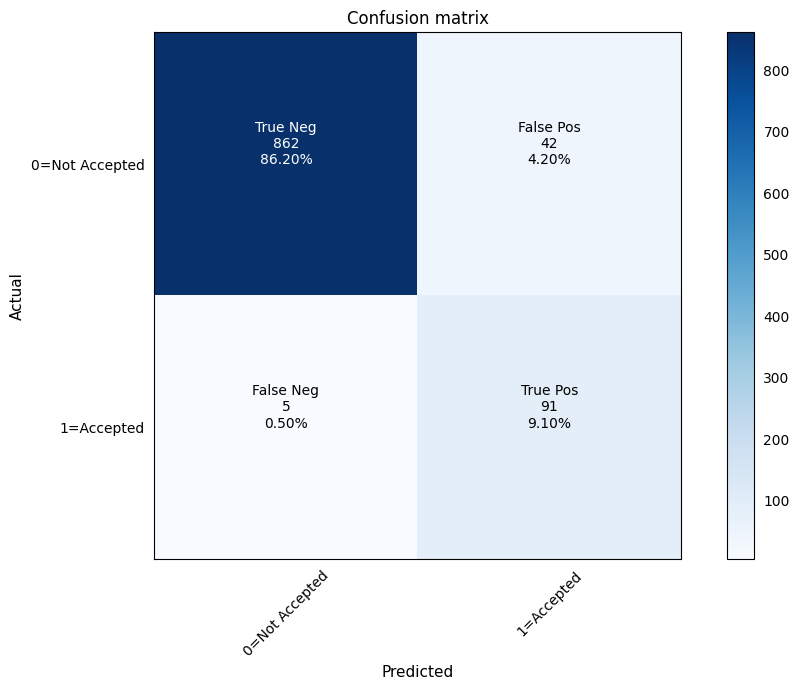

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       904
           1       0.68      0.95      0.79        96

    accuracy                           0.95      1000
   macro avg       0.84      0.95      0.88      1000
weighted avg       0.96      0.95      0.96      1000
 

Jaccard Score: 0.6594202898550725
Log loss: 1.6940517092885063 

Finished Decision Tree
Train recall: 0.961
Test  recall: 0.948


In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=0,
    class_weight='balanced'
)

acc_test_dt, acc_train_dt, rec_test_dt, rec_train_dt = modeling(
    clf=dt_clf,
    x=x,
    y=y,
    test_size=0.2,
    classes={'Not Accepted': 0, 'Accepted': 1},
    model_name='DecisionTree',
    stratify=True
)

print("Finished Decision Tree")
print(f"Train recall: {rec_train_dt:.3f}")
print(f"Test  recall: {rec_test_dt:.3f}")

In [50]:
# Trying different test sizes for Decision Tree
change_test_size(dt_clf, x, y, 'DecisionTree')

In [51]:
if 'best_model_test' not in locals() and 'best_model_test' not in globals():
    best_model_test = pd.DataFrame(columns=['Model', 'test_size', 'Accuracy', 'Recall'])
if 'best_model_train' not in locals() and 'best_model_train' not in globals():
    best_model_train = pd.DataFrame(columns=['Model', 'test_size', 'Accuracy', 'Recall'])

# (using test_size = 0.2)
best_model_test.loc[len(best_model_test.index)] = [
    'DecisionTree', '0.2', acc_test_dt, rec_test_dt
]
best_model_train.loc[len(best_model_train.index)] = [
    'DecisionTree', '0.2', acc_train_dt, rec_train_dt
]

best_model_test, best_model_train

(          Model test_size  Accuracy    Recall
 0   LogisticReg       0.2     0.953  0.635417
 1  DecisionTree       0.2     0.953  0.947917,
           Model test_size  Accuracy    Recall
 0   LogisticReg       0.2   0.95225  0.632812
 1  DecisionTree       0.2   0.96650  0.960938)